# Project name: twitter depressive texts detection classifier
 
## Author: Yakang(Winifred) Xu, Linguistics MA, Århus Universitet

# Import Libraries##

In [0]:
import warnings
warnings.filterwarnings("ignore")
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
import tweepy
import json
import re
import nltk
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
from sklearn.feature_extraction.text import TfidfVectorizer
import imageio
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
## I actually got a problem here: I had no wordcould package installed so it returned ""ModuleNotFoundError: No module named 'wordcloud'.
## So remember to check if you have wordcould package in anaconda->lib->site-packages.If you have more than one, or no, or the wrong version,
## delete them and download the version match one on https://www.lfd.uci.edu/~gohlke/pythonlibs/#wordcloud. Then open the anaconda prompt,
## and type "cd 'the path of your wordcloud whl file'" and you will get into the path and then type the file name of your wordcloud whl file.
## Then finally you will get the wordcloud package installed successfully.
import matplotlib as mpl
import csv
import matplotlib
import matplotlib.pyplot as plt

import operator
from textblob import TextBlob
from textblob import Word
from textblob.sentiments import NaiveBayesAnalyzer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


# Authentification#

In [0]:
# Twitter Api Credentials
consumer_key = 'XcTcC3mt9JZHKleZYAwkARpXp'
consumer_secret = 'jQIDGaFvXZdjsCdshR0aXcG3stnMpFuhhRkGMUeMPpbBqoQSya'
access_token = '341725024-8ir7Nc1Y9idvMEKtrT9bQwoMfyVhf1Cux0gaDA5Q'
access_token_secret = '0KAad2iOxTRBzNFXokDg2r0J4rw6grhpMUhl8eW0xoUt6'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret) #Interacting with twitter's API
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API (auth) #creating the API object

# Extracting  the Depression-diagnosed Tweets#

In [0]:
depressive_group1 = []
for tweet in tweepy.Cursor (api.search, q = "I'm diagnosed depression", lang = "en").items(2000): 
    depressive_group1.append(tweet)
    
print (type(depressive_group1))
print (len(depressive_group1))
#print (results[4000].text)

<class 'list'>
319


In [0]:
depressive_group2 = []
for tweet in tweepy.Cursor (api.search, q = "I am diagnosed depression", lang = "en").items(2000): 
    depressive_group2.append(tweet)
    
print (type(depressive_group2))
print (len(depressive_group2))
#print (results[4000].text)

<class 'list'>
60


In [0]:
depressive_group3 = []
for tweet in tweepy.Cursor (api.search, q = "I was diagnosed depression", lang = "en").items(2000): 
    depressive_group3.append(tweet)
    
print (type(depressive_group3))
print (len(depressive_group3))
#print (results[4000].text)

<class 'list'>
357


In [0]:
depressive_group4 = []
for tweet in tweepy.Cursor (api.search, q = "I have been diagnosed depression", lang = "en").items(2000): 
    depressive_group4.append(tweet)
    
print (type(depressive_group4))
print (len(depressive_group4))
#print (results[4000].text)

<class 'list'>
70


In [0]:
depressive_group5 = []
for tweet in tweepy.Cursor (api.search, q = "I've been diagnosed depression", lang = "en").items(2000): 
    depressive_group5.append(tweet)
    
print (type(depressive_group5))
print (len(depressive_group5))
#print (results[4000].text)

<class 'list'>
188


In [0]:
depressive_group = depressive_group1 + depressive_group2 + depressive_group3 + depressive_group4 + depressive_group5
len(depressive_group)

994

In [0]:
def tweets_df(depressive_group):
    id_list = [tweet.id for tweet  in depressive_group]
    depressive_data_set = pd.DataFrame(id_list, columns = ["id"])
    
    depressive_data_set["text"] = [tweet.text for tweet in depressive_group]
    depressive_data_set["created_at"] = [tweet.created_at for tweet in depressive_group]
    depressive_data_set["retweet_count"] = [tweet.retweet_count for tweet in depressive_group]
    depressive_data_set["user_screen_name"] = [tweet.author.screen_name for tweet in depressive_group]
    depressive_data_set["user_followers_count"] = [tweet.author.followers_count for tweet in depressive_group]
    depressive_data_set["user_location"] = [tweet.author.location for tweet in depressive_group]
    depressive_data_set["Hashtags"] = [tweet.entities.get('hashtags') for tweet in depressive_group]
    
    
    return depressive_data_set
depressive_data_set = tweets_df(depressive_group)
depressive_data_set["text"] = [re.sub(r"(@.*(\s|$))",'', str(x)) for x in depressive_data_set['text']]

In [0]:
depressive_data_set.head(50)

,id,text,created_at,retweet_count,user_screen_name,user_followers_count,user_location,Hashtags
0,1270829754384625664,Since I am not clinically diagnosed with depre...,2020-06-10 21:26:38,0,lauren_paige100,142,,[]
1,1270816599885430786,RT,2020-06-10 20:34:22,1,14Vargen14,228,"Sweden,Europe,Earth",[]
2,1270813109402456066,,2020-06-10 20:20:30,1,paper_and_quill,60,he/him - 16 - kinnie on main,[]
3,1270807602612654082,,2020-06-10 19:58:37,0,123Mich,18,"North West, England",[]
4,1270778703782412289,,2020-06-10 18:03:47,0,snowy__bunnie,68,New Zealand,[]
5,1270773294896222211,,2020-06-10 17:42:17,0,gbosabiaspin,241,African shop is a trek England,[]
6,1270756284925718528,i'm sorry but if you're not diagnosed with dep...,2020-06-10 16:34:42,0,candykillua,351,she/her ♡ 18,[]
7,1270745941826510851,,2020-06-10 15:53:36,0,yangyangyumyum,153,,[]
8,1270743636834160640,I need a job. I’m basically 20 now with next t...,2020-06-10 15:44:26,0,TrenholmRachel,260,,[]
9,1270741531972874241,the way my family treated (and still talks abo...,2020-06-10 15:36:05,0,meyaohyeah,168,,[]


# Remove Duplicate Depression-diagnosed Tweets#

In [0]:
text = depressive_data_set["text"]

for i in range(0,len(text)):
    txt = ' '.join(word for word in text[i] .split() if not word.startswith('https:'))
    depressive_data_set.at[i, 'text2'] = txt
    
depressive_data_set.drop_duplicates('text2', inplace=True)
depressive_data_set.reset_index(drop = True, inplace=True)
depressive_data_set.drop('text', axis = 1, inplace = True)
depressive_data_set.rename(columns={'text2': 'text'}, inplace=True)

In [0]:
depressive_data_set.head(50)

,id,created_at,retweet_count,user_screen_name,user_followers_count,user_location,Hashtags,text
0,1270829754384625664,2020-06-10 21:26:38,0,lauren_paige100,142,,[],Since I am not clinically diagnosed with depre...
1,1270816599885430786,2020-06-10 20:34:22,1,14Vargen14,228,"Sweden,Europe,Earth",[],RT
2,1270813109402456066,2020-06-10 20:20:30,1,paper_and_quill,60,he/him - 16 - kinnie on main,[],
3,1270756284925718528,2020-06-10 16:34:42,0,candykillua,351,she/her ♡ 18,[],i'm sorry but if you're not diagnosed with dep...
4,1270743636834160640,2020-06-10 15:44:26,0,TrenholmRachel,260,,[],I need a job. I’m basically 20 now with next t...
5,1270741531972874241,2020-06-10 15:36:05,0,meyaohyeah,168,,[],the way my family treated (and still talks abo...
6,1270679174261305344,2020-06-10 11:28:17,0,_eurydx,47,ophelia | 13,[],in love with an With an e-girl I'm in love wit...
7,1270635660572078080,2020-06-10 08:35:23,0,chromasine,5,,[],I haven't been diagnosed with any kind of ment...
8,1270534979475460096,2020-06-10 01:55:19,0,SimmerSam04,1073,,[],I'm like whenever someone makes a mean comment...
9,1270526888704970757,2020-06-10 01:23:10,0,jaeminclit,43,⚘ san's right sanpod ✩,[],"i've been diagnosed with depression, social an..."


In [0]:
depressive_sentence_bag0 = depressive_data_set['text']

In [0]:
print(depressive_sentence_bag0)

0      Since I am not clinically diagnosed with depre...
1                                                     RT
2                                                       
3      i'm sorry but if you're not diagnosed with dep...
4      I need a job. I’m basically 20 now with next t...
                             ...                        
278    But more than anything, I am LIVID. I barely g...
279    I've been wondering about asking if I can go g...
280    I have a mental illness I've been diagnosed wi...
281    TW//sex. assault/rape "Jokes" about rape are n...
282    I've been absent for a long time now and I fee...
Name: text, Length: 283, dtype: object


In [0]:
depressive_sentence_bag = nltk.sent_tokenize(str(depressive_sentence_bag0.values.tolist()))
print(depressive_sentence_bag)

['[\'Since I am not clinically diagnosed with depression I just say I’m going through “the big sad” and let me tell you…\', \'RT\', \'\', "i\'m sorry but if you\'re not diagnosed with depression don\'t go around saying you are depressed because that just ke…", \'I need a job.', 'I’m basically 20 now with next to no credible experience.', 'I dropped out of high school mid-way throug…\', "the way my family treated (and still talks about) my mom when she was diagnosed with depression is the reason I\'m n…", "in love with an With an e-girl I\'m in love with an I’m in love with an I\'m in love with an With an e-girl Mom took…", "I haven\'t been diagnosed with any kind of mental illness but reading through Gaga Daily threads make me feel like I…", "I\'m like whenever someone makes a mean comment about any mental illness, like ocd or depress…", "i\'ve been diagnosed with depression, social anxiety, i\'m really really x927429472836386 introverted, the reason why…", \'Lrt: I’m not retweeting th

In [0]:
depressive_word_bag0 = []
for sentence in depressive_sentence_bag:
  depressive_word_bag0 = nltk.word_tokenize(str(depressive_sentence_bag))

from nltk.corpus import stopwords
stop_words = stopwords.words('english')
depressive_word_bag1 = [w for w in depressive_word_bag0 if w not in stop_words]

from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
depressive_word_bag = tokenizer.tokenize(str(depressive_word_bag1))

In [0]:
print(depressive_word_bag)

['Since', 'I', 'clinically', 'diagnosed', 'depression', 'I', 'say', 'I', 'going', 'big', 'sad', 'let', 'tell', 'you', 'RT', 'i', 'm', 'sorry', 'you', 're', 'diagnosed', 'depression', 'don', 't', 'go', 'around', 'saying', 'depressed', 'ke', 'I', 'need', 'job', 'I', 'basically', '20', 'next', 'credible', 'experience', 'I', 'dropped', 'high', 'school', 'mid', 'way', 'throug', 'way', 'family', 'treated', 'still', 'talks', 'mom', 'diagnosed', 'depression', 'reason', 'I', 'm', 'n', 'love', 'With', 'e', 'girl', 'I', 'm', 'love', 'I', 'love', 'I', 'm', 'love', 'With', 'e', 'girl', 'Mom', 'took', 'I', 'haven', 't', 'diagnosed', 'kind', 'mental', 'illness', 'reading', 'Gaga', 'Daily', 'threads', 'make', 'feel', 'like', 'I', 'I', 'm', 'like', 'whenever', 'someone', 'makes', 'mean', 'comment', 'mental', 'illness', 'like', 'ocd', 'depress', 'i', 've', 'diagnosed', 'depression', 'social', 'anxiety', 'i', 'm', 'really', 'really', 'x927429472836386', 'introverted', 'reason', 'why', 'Lrt', 'I', 'retwee

# Extracting  the Depressive Candidate Tweets#

In [0]:
depressive_candidate0 = []
for tweet in tweepy.Cursor (api.search, q = "depress", lang = "en").items(500): 
    depressive_candidate0.append(tweet)
    
print (type(depressive_candidate0))
print (len(depressive_candidate0))
#print (results[4000].text)

<class 'list'>
500


In [0]:
def tweets_df(depressive_candidate0):
    id_list = [tweet.id for tweet  in depressive_candidate0]
    depressive_candidate_data_set = pd.DataFrame(id_list, columns = ["id"])
    
    depressive_candidate_data_set["text"] = [tweet.text for tweet in depressive_candidate0]
    depressive_candidate_data_set["created_at"] = [tweet.created_at for tweet in depressive_candidate0]
    depressive_candidate_data_set["retweet_count"] = [tweet.retweet_count for tweet in depressive_candidate0]
    depressive_candidate_data_set["user_screen_name"] = [tweet.author.screen_name for tweet in depressive_candidate0]
    depressive_candidate_data_set["user_followers_count"] = [tweet.author.followers_count for tweet in depressive_candidate0]
    depressive_candidate_data_set["user_location"] = [tweet.author.location for tweet in depressive_candidate0]
    depressive_candidate_data_set["Hashtags"] = [tweet.entities.get('hashtags') for tweet in depressive_candidate0]
    
    
    return depressive_candidate_data_set
depressive_candidate_data_set = tweets_df(depressive_candidate0)
depressive_candidate_data_set["text"] = [re.sub(r"(@.*(\s|$))",'', str(x)) for x in depressive_candidate_data_set['text']]

In [0]:
depressive_candidate_data_set.head(50)

,id,text,created_at,retweet_count,user_screen_name,user_followers_count,user_location,Hashtags
0,1270839822375178240,,2020-06-10 22:06:39,0,TommyMarion10,49,,[]
1,1270839814561034240,RT,2020-06-10 22:06:37,27113,brendapierce,247,"Snohomish, WA, USA",[]
2,1270839753563234304,stress n depress,2020-06-10 22:06:22,0,yungbentai,572,marvin's room,[]
3,1270839340143243265,RT,2020-06-10 22:04:44,27113,TatoneRuth,7,,[]
4,1270839268731236352,RT,2020-06-10 22:04:27,27113,Pworldawg,1072,,[]
5,1270839202985328640,,2020-06-10 22:04:11,0,Cascadiaspora,21,diaspora,[]
6,1270839026761846784,RT,2020-06-10 22:03:29,27113,maxxmyrick1,3,,[]
7,1270839012077588481,RT,2020-06-10 22:03:26,277,kristi_morris24,4235,Pennsylvania,[]
8,1270838939285426184,RT \nthat there is a tiny class of people who ...,2020-06-10 22:03:08,14,iamtroymilton,846,"Orlando, FL",[]
9,1270838405702782977,RT,2020-06-10 22:01:01,27113,adchick22,3632,"Philadelphia, PA",[]


# Remove Duplicate Depressive Candidate Tweets#

In [0]:
text = depressive_candidate_data_set["text"]

for i in range(0,len(text)):
    txt = ' '.join(word for word in text[i] .split() if not word.startswith('https:'))
    depressive_candidate_data_set.at[i, 'text2'] = txt
    
depressive_candidate_data_set.drop_duplicates('text2', inplace=True)
depressive_candidate_data_set.reset_index(drop = True, inplace=True)
depressive_candidate_data_set.drop('text', axis = 1, inplace = True)
depressive_candidate_data_set.rename(columns={'text2': 'text'}, inplace=True)

In [0]:
depressive_candidate_data_set.head(50)

,id,created_at,retweet_count,user_screen_name,user_followers_count,user_location,Hashtags,text
0,1270839822375178240,2020-06-10 22:06:39,0,TommyMarion10,49,,[],
1,1270839814561034240,2020-06-10 22:06:37,27113,brendapierce,247,"Snohomish, WA, USA",[],RT
2,1270839753563234304,2020-06-10 22:06:22,0,yungbentai,572,marvin's room,[],stress n depress
3,1270838939285426184,2020-06-10 22:03:08,14,iamtroymilton,846,"Orlando, FL",[],RT that there is a tiny class of people who ge...
4,1270837524693385218,2020-06-10 21:57:31,0,KanaraEleven,1,A New Cleaner Leaner Account,[],"Big Terf energy unfortunately, I’m so afraid r..."
5,1270836748889796615,2020-06-10 21:54:26,0,OnMeHols,246,Manchester,[],I swear like 50% of the time I look at this we...
6,1270835211803037696,2020-06-10 21:48:20,0,beefjurky,372,,[],"As much as I love future bass, I literally hav..."
7,1270835041132830720,2020-06-10 21:47:39,0,hanorahann,297,"La Crosse, WI",[],Yep. He doesn’t depress me nearly as much as t...
8,1270833969416802310,2020-06-10 21:43:23,0,sumschall,1079,Central FL,[],Twitter is the only social media app that does...
9,1270833758774550528,2020-06-10 21:42:33,0,cargoleggings,180,"Phoenix, AZ she/her",[],nobody talks depress to loss memory


In [0]:
depressive_candidate_sentence_bag0 = depressive_candidate_data_set['text']

In [0]:
print(depressive_candidate_sentence_bag0)

0                                                      
1                                                    RT
2                                      stress n depress
3     RT that there is a tiny class of people who ge...
4     Big Terf energy unfortunately, I’m so afraid r...
5     I swear like 50% of the time I look at this we...
6     As much as I love future bass, I literally hav...
7     Yep. He doesn’t depress me nearly as much as t...
8     Twitter is the only social media app that does...
9                   nobody talks depress to loss memory
10                                        Stay hopeful.
11    But now I can call my self in recovery phase. ...
12    I don’t simply tell myself that I’m depress. E...
13    Being so bitter and feeling depress is 2 diffe...
14    i’m not even gon let this shit depress me. lif...
15    "It's fine for now," She told him, nearing the...
16                     They taxin outside I’m depress 🙄
17    Yup. Sometimes we need to depress to impre

In [0]:
depressive_candidate_sentence_bag = nltk.sent_tokenize(str(depressive_candidate_sentence_bag0.values.tolist()))
print(depressive_candidate_sentence_bag)

["['', 'RT', 'stress n depress', 'RT that there is a tiny class of people who get a li…', 'Big Terf energy unfortunately, I’m so afraid reading this is going to depress me fr fr.", "', 'I swear like 50% of the time I look at this website all it does it depress me.", "Its like a form of self harming', 'As much as I love future bass, I literally have to refrain from it so I don’t depress myself', 'Yep.", 'He doesn’t depress me nearly as much as the stubborn remnant—too substantial—still supporting him.', "', 'Twitter is the only social media app that doesn’t depress me \\U0001f974', 'nobody talks depress to loss memory', 'Stay hopeful.", "', 'But now I can call my self in recovery phase.", "I’m no longer get so easily jealous with other having kids because I…', 'I don’t simply tell myself that I’m depress.", 'Eventho’ I’m so down.', 'I cant sleep.', "I always think about how useless m…', 'Being so bitter and feeling depress is 2 different meaning.", 'When my son died 2 years ago.', 'I wa

In [0]:
depressive_candidate_word_bag0 = []
for sentence in depressive_candidate_sentence_bag:
  depressive_candidate_word_bag0 = nltk.word_tokenize(str(depressive_candidate_sentence_bag))

from nltk.corpus import stopwords
stop_words = stopwords.words('english')
depressive_candidate_word_bag1 = [w for w in depressive_candidate_word_bag0 if w not in stop_words]

from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
depressive_candidate_word_bag = tokenizer.tokenize(str(depressive_candidate_word_bag1))

In [0]:
print(depressive_candidate_word_bag)

['RT', 'stress', 'n', 'depress', 'RT', 'tiny', 'class', 'people', 'get', 'li', 'Big', 'Terf', 'energy', 'unfortunately', 'I', 'afraid', 'reading', 'going', 'depress', 'fr', 'fr', 'I', 'swear', 'like', '50', 'time', 'I', 'look', 'website', 'depress', 'Its', 'like', 'form', 'self', 'harming', 'As', 'much', 'I', 'love', 'future', 'bass', 'I', 'literally', 'refrain', 'I', 'depress', 'Yep', 'He', 'depress', 'nearly', 'much', 'stubborn', 'remnant', 'too', 'substantial', 'still', 'supporting', 'Twitter', 'social', 'media', 'app', 'depress', 'U0001f974', 'nobody', 'talks', 'depress', 'loss', 'memory', 'Stay', 'hopeful', 'But', 'I', 'call', 'self', 'recovery', 'phase', 'I', 'longer', 'get', 'easily', 'jealous', 'kids', 'I', 'I', 'simply', 'tell', 'I', 'depress', 'Eventho', 'I', 'I', 'cant', 'sleep', 'I', 'always', 'think', 'useless', 'm', 'Being', 'bitter', 'feeling', 'depress', '2', 'different', 'meaning', 'When', 'son', 'died', '2', 'years', 'ago', 'I', 'sad', 'I', 'easily', 'i', 'even', 'gon

# Extracting  the Non-depression Tweets#

In [0]:
non_depression_group0 = []
for tweet in tweepy.Cursor (api.search, q = '-"depress"', lang = "en", sleep_on_rate_limit=False).items(500): 
    non_depression_group0.append(tweet)
    
print (type(non_depression_group0))
print (len(non_depression_group0))
#print (results[4000].text)

<class 'list'>
500


In [0]:
def tweets_df(non_depression_group0):
    id_list = [tweet.id for tweet  in non_depression_group0]
    non_depression_data_set = pd.DataFrame(id_list, columns = ["id"])
    
    non_depression_data_set["text"] = [tweet.text for tweet in non_depression_group0]
    non_depression_data_set["created_at"] = [tweet.created_at for tweet in non_depression_group0]
    non_depression_data_set["retweet_count"] = [tweet.retweet_count for tweet in non_depression_group0]
    non_depression_data_set["user_screen_name"] = [tweet.author.screen_name for tweet in non_depression_group0]
    non_depression_data_set["user_followers_count"] = [tweet.author.followers_count for tweet in non_depression_group0]
    non_depression_data_set["user_location"] = [tweet.author.location for tweet in non_depression_group0]
    non_depression_data_set["Hashtags"] = [tweet.entities.get('hashtags') for tweet in non_depression_group0]
    
    return  non_depression_data_set
non_depression_data_set = tweets_df(non_depression_group0)
non_depression_data_set["text"] = [re.sub(r"(@.*(\s|$))",'', str(x)) for x in non_depression_data_set['text']]

In [0]:
non_depression_data_set.head(50)

,id,text,created_at,retweet_count,user_screen_name,user_followers_count,user_location,Hashtags
0,1270839894307454981,,2020-06-10 22:06:56,0,braylan_black,32,,[]
1,1270839893955149825,,2020-06-10 22:06:56,0,itzrse,1705,s/h,[]
2,1270839893862858753,RT,2020-06-10 22:06:56,10,TyraBarlatier,1980,"Ocala, FL",[]
3,1270839893766410241,RT,2020-06-10 22:06:56,806,lunar_seoks,199,,[]
4,1270839893728669698,RT,2020-06-10 22:06:56,1,getfeas_,2041,"Elmont, New York",[]
5,1270839893636374529,RT,2020-06-10 22:06:56,18,tuscanysunsets,4167,USA,[]
6,1270839893623799810,,2020-06-10 22:06:56,0,vanxtk,354,,[]
7,1270839893523038211,RT,2020-06-10 22:06:56,92,cjmoreno_94,220,"Dallas, TX",[]
8,1270839893338599424,The more I see how you move the more distant I...,2020-06-10 22:06:56,0,QueenShvy,445,"Cleveland, OH",[]
9,1270839893313425409,,2020-06-10 22:06:56,0,RossLeslieComic,1532,"Rosyth, Scotland",[]


# Remove Duplicate Non-depression Tweets#

In [0]:
text = non_depression_data_set["text"]

for i in range(0,len(text)):
    txt = ' '.join(word for word in text[i] .split() if not word.startswith('https:'))
    non_depression_data_set.at[i, 'text2'] = txt
    
non_depression_data_set.drop_duplicates('text2', inplace=True)
non_depression_data_set.reset_index(drop = True, inplace=True)
non_depression_data_set.drop('text', axis = 1, inplace = True)
non_depression_data_set.rename(columns={'text2': 'text'}, inplace=True)

In [0]:
non_depression_data_set.head(50)

,id,created_at,retweet_count,user_screen_name,user_followers_count,user_location,Hashtags,text
0,1270839894307454981,2020-06-10 22:06:56,0,braylan_black,32,,[],
1,1270839893862858753,2020-06-10 22:06:56,10,TyraBarlatier,1980,"Ocala, FL",[],RT
2,1270839893338599424,2020-06-10 22:06:56,0,QueenShvy,445,"Cleveland, OH",[],The more I see how you move the more distant I...
3,1270839893305024513,2020-06-10 22:06:56,326,sunmicursed,414,,[],RT #48. Let Me Know (Dark &amp; Wild)
4,1270839893200195585,2020-06-10 22:06:56,0,CumzPre,6,,[],Literally dying.
5,1270839893128876035,2020-06-10 22:06:56,0,OKCStormWatcher,15386,"Oklahoma City, OK",[],"The latest StormWatcher's ""The Daily Storm""!"
6,1270839893086920710,2020-06-10 22:06:56,1,zeroborta,348,"Mogadishu, Somalia",[],RT They k…
7,1270839893065789440,2020-06-10 22:06:56,0,carljscimeca,158,"Los Angeles, CA",[],Imma come out on top or die trying
8,1270839893065781249,2020-06-10 22:06:56,3,coonavass,3953,,[],RT The 2020s will be much…
9,1270839893053394949,2020-06-10 22:06:56,5,DanWantsFreedom,58297,"Fort Lauderdale, Florida",[],RT Defunding the police is a radical idea that...


In [0]:
non_depression_sentence_bag0 = non_depression_data_set['text']

In [0]:
print(non_depression_sentence_bag0)

0                                                       
1                                                     RT
2      The more I see how you move the more distant I...
3                  RT #48. Let Me Know (Dark &amp; Wild)
4                                       Literally dying.
                             ...                        
142                                     We’re not alone🤡
143                I need some shits like this I stg 🔥🔥🔥
144          RT A lot of relationships will end in prem…
145    Streets saying the kfc in Korea is the best th...
146                                            cutie 😭❤️
Name: text, Length: 147, dtype: object


In [0]:
non_depression_sentence_bag = nltk.sent_tokenize(str(non_depression_sentence_bag0.values.tolist()))
print(non_depression_sentence_bag)

["['', 'RT', 'The more I see how you move the more distant I become !", 'Don’t expect me to kick it like we use too.', "', 'RT #48.", "Let Me Know (Dark &amp; Wild)', 'Literally dying.", '\', \'The latest StormWatcher\\\'s "The Daily Storm"!', "', 'RT They k…', 'Imma come out on top or die trying', 'RT The 2020s will be much…', 'RT Defunding the police is a radical idea that will not protect ANY Americans.", "Right n…', 'RT bro, you think he was the first to land in america.", "you already…', 'RT RT + LIKE INSANE LUCK ON MONOPOLY!", 'Use code TCK on Gamdom for some…\', \'RT via\', \'RT They "reimagined" slavery into prisons.', 'We don\\\'t need to "reimagine" the police…\', \'weeks left for my little monkey to arrive❤️\', "I don\'t find you that interesting.', '[WILL] You will.', '[HANNIBAL]", \'Me when anyone brings up the Indians losing the World Series game\', \'RT .....girl go to hell\', \'Freak in u\', \'omashola na calm guy ooo.', "he did nt push mercy back bt .why she push am na

In [0]:
non_depression_word_bag0 = []
for sentence in non_depression_sentence_bag:
  non_depression_word_bag0 = nltk.word_tokenize(str(non_depression_sentence_bag))

from nltk.corpus import stopwords
stop_words = stopwords.words('english')
non_depression_word_bag1 = [w for w in non_depression_word_bag0 if w not in stop_words]

from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
non_depression_word_bag = tokenizer.tokenize(str(non_depression_word_bag1))
print(non_depression_word_bag)

['RT', 'The', 'I', 'see', 'move', 'distant', 'I', 'become', 'Don', 'expect', 'kick', 'like', 'use', 'RT', '48', 'Let', 'Me', 'Know', 'Dark', 'amp', 'Wild', 'Literally', 'dying', 'The', 'latest', 'StormWatcher', 's', 'The', 'Daily', 'Storm', 'RT', 'They', 'k', 'Imma', 'come', 'top', 'die', 'trying', 'RT', 'The', '2020s', 'much', 'RT', 'Defunding', 'police', 'radical', 'idea', 'protect', 'ANY', 'Americans', 'Right', 'n', 'RT', 'bro', 'think', 'first', 'land', 'america', 'already', 'RT', 'RT', 'LIKE', 'INSANE', 'LUCK', 'ON', 'MONOPOLY', 'Use', 'code', 'TCK', 'Gamdom', 'some', 'RT', 'via', 'RT', 'They', 'reimagined', 'slavery', 'prisons', 'We', 'don', 't', 'need', 'reimagine', 'police', 'weeks', 'left', 'little', 'monkey', 'arrive', 'I', 'don', 't', 'find', 'interesting', 'WILL', 'You', 'HANNIBAL', 'Me', 'anyone', 'brings', 'Indians', 'losing', 'World', 'Series', 'game', 'RT', 'girl', 'go', 'hell', 'Freak', 'u', 'omashola', 'na', 'calm', 'guy', 'ooo', 'nt', 'push', 'mercy', 'back', 'bt', '

# Calculating the term frequency of the 3 groups


In [0]:
#calculate the tf_idf for the depressive-diagnosed group and remove the duplicate words in the depressive word bag
from collections import Counter
depressive_word_count = {}
depressive_candidate_word_count = {}
non_depression_word_count = {}

depressive_word_count = Counter(depressive_word_bag)
depressive_candidate_word_count = Counter(depressive_candidate_word_bag)
non_depression_word_count = Counter(non_depression_word_bag)
totalnum_depressive_word = sum(depressive_word_count.values())
totalnum_depressive_candidate_word = sum(depressive_candidate_word_count.values())
totalnum_non_depression_word = sum(non_depression_word_count.values())

In [0]:
print(totalnum_depressive_word)
print(totalnum_depressive_candidate_word)
print(totalnum_non_depression_word)

3601
378
1013


In [0]:
def computeTF(totalnum, wordcount):
  TF = {}
  for word,count in wordcount.items():
    TF[word] = count / totalnum
  return TF

In [0]:
depressive_tf = computeTF(totalnum_depressive_word, depressive_word_count)
depressive_candidate_tf = computeTF(totalnum_depressive_candidate_word, depressive_candidate_word_count)
non_depression_tf = computeTF(totalnum_non_depression_word, non_depression_word_count)
print(depressive_tf)
print(depressive_candidate_tf)
print(non_depression_tf)

{'Since': 0.0005554012774229381, 'I': 0.1130241599555679, 'clinically': 0.0019439044709802832, 'diagnosed': 0.05193001943904471, 'depression': 0.04693140794223827, 'say': 0.0019439044709802832, 'going': 0.0016662038322688142, 'big': 0.0008331019161344071, 'sad': 0.002499305748403221, 'let': 0.00027770063871146905, 'tell': 0.0011108025548458762, 'you': 0.0016662038322688142, 'RT': 0.0019439044709802832, 'i': 0.009719522354901417, 'm': 0.0116634268258817, 'sorry': 0.0011108025548458762, 're': 0.0008331019161344071, 'don': 0.0027770063871146904, 't': 0.007775617883921133, 'go': 0.0022216051096917524, 'around': 0.0008331019161344071, 'saying': 0.0011108025548458762, 'depressed': 0.0013885031935573452, 'ke': 0.00027770063871146905, 'need': 0.0005554012774229381, 'job': 0.0008331019161344071, 'basically': 0.0008331019161344071, '20': 0.0008331019161344071, 'next': 0.0005554012774229381, 'credible': 0.00027770063871146905, 'experience': 0.0008331019161344071, 'dropped': 0.0005554012774229381,

In [0]:
sorted_depressive_tf = sorted(depressive_tf.items(),key = lambda depressive_tf:depressive_tf[1],reverse=True)
sorted_depressive_candidate_tf = sorted(depressive_candidate_tf.items(),key = lambda depressive_candidate_tf:depressive_candidate_tf[1],reverse=True)
sorted_non_depression_tf = sorted(non_depression_tf.items(),key = lambda non_depression_tf:non_depression_tf[1],reverse=True)

print(sorted_depressive_tf)
print(sorted_depressive_candidate_tf)
print(sorted_non_depression_tf)

[('I', 0.1130241599555679), ('diagnosed', 0.05193001943904471), ('depression', 0.04693140794223827), ('anxiety', 0.01666203832268814), ('m', 0.0116634268258817), ('i', 0.009719522354901417), ('t', 0.007775617883921133), ('like', 0.007497917245209664), ('ve', 0.006664815329075257), ('mental', 0.006109414051652319), ('get', 0.006109414051652319), ('years', 0.005554012774229381), ('My', 0.004720910858094974), ('w', 0.004720910858094974), ('year', 0.004443210219383505), ('s', 0.004165509580672035), ('never', 0.004165509580672035), ('since', 0.004165509580672035), ('got', 0.004165509580672035), ('people', 0.0038878089419605664), ('ago', 0.0038878089419605664), ('still', 0.0036101083032490976), ('Depression', 0.0036101083032490976), ('When', 0.0036101083032490976), ('severe', 0.0036101083032490976), ('school', 0.0033324076645376284), ('feel', 0.0033324076645376284), ('amp', 0.0033324076645376284), ('know', 0.0033324076645376284), ('really', 0.0030547070258261596), ('don', 0.00277700638711469

In [0]:
top50depressive_tf = dict(sorted_depressive_tf[0:50])
top50depressive_candidate_tf = dict(sorted_depressive_candidate_tf[0:50])
top50non_depression_tf = dict(sorted_non_depression_tf[0:50])
print(top50depressive_tf)
print(top50depressive_candidate_tf)
print(top50non_depression_tf)

{'I': 0.1130241599555679, 'diagnosed': 0.05193001943904471, 'depression': 0.04693140794223827, 'anxiety': 0.01666203832268814, 'm': 0.0116634268258817, 'i': 0.009719522354901417, 't': 0.007775617883921133, 'like': 0.007497917245209664, 've': 0.006664815329075257, 'mental': 0.006109414051652319, 'get': 0.006109414051652319, 'years': 0.005554012774229381, 'My': 0.004720910858094974, 'w': 0.004720910858094974, 'year': 0.004443210219383505, 's': 0.004165509580672035, 'never': 0.004165509580672035, 'since': 0.004165509580672035, 'got': 0.004165509580672035, 'people': 0.0038878089419605664, 'ago': 0.0038878089419605664, 'still': 0.0036101083032490976, 'Depression': 0.0036101083032490976, 'When': 0.0036101083032490976, 'severe': 0.0036101083032490976, 'school': 0.0033324076645376284, 'feel': 0.0033324076645376284, 'amp': 0.0033324076645376284, 'know': 0.0033324076645376284, 'really': 0.0030547070258261596, 'don': 0.0027770063871146904, 'someone': 0.0027770063871146904, 'would': 0.002777006387

<BarContainer object of 50 artists>

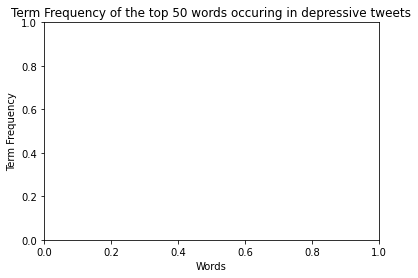

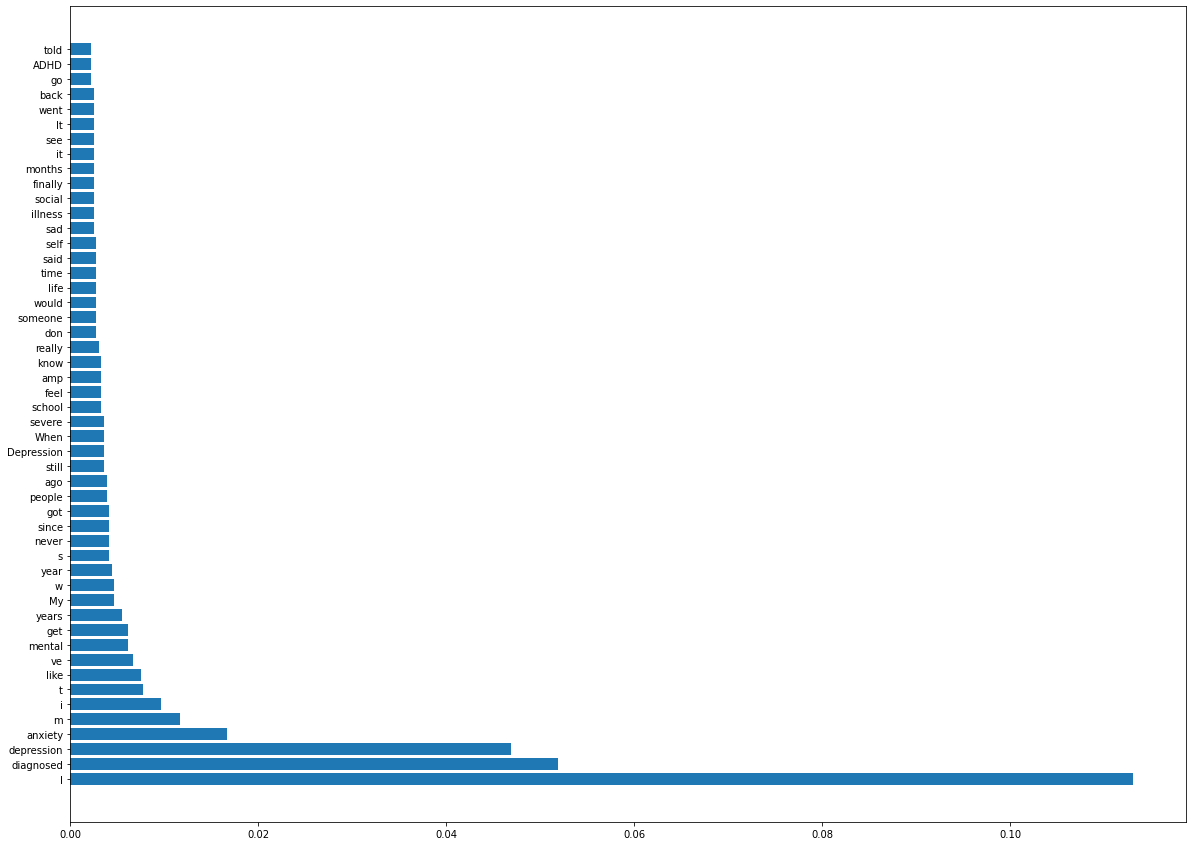

In [0]:
x = list(top50depressive_tf.keys())
y = list(top50depressive_tf.values())
plt.xlabel('Words')
plt.ylabel('Term Frequency')
plt.title('Term Frequency of the top 50 words occuring in depressive tweets')
plt.figure(figsize = (20,15)) 
plt.barh(x, y)

<BarContainer object of 50 artists>

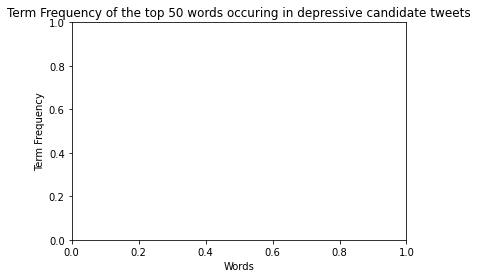

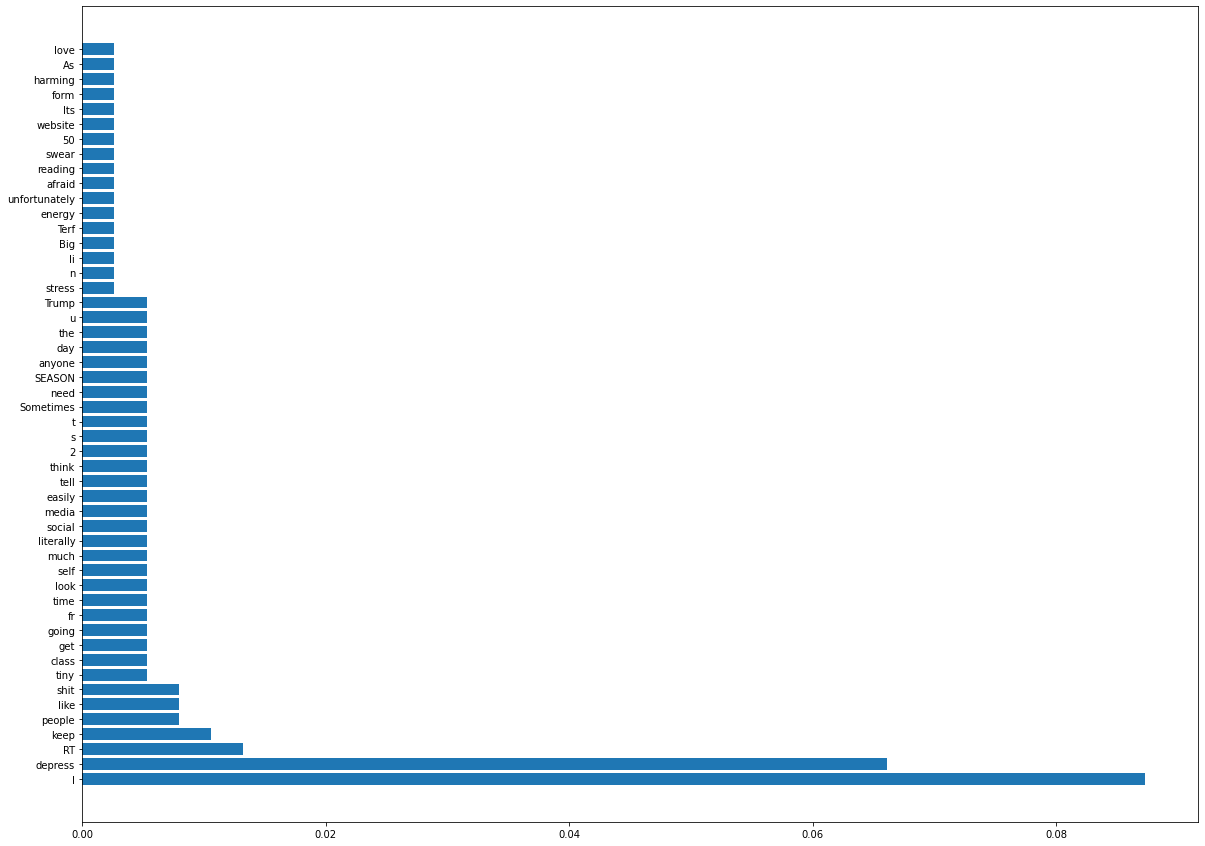

In [0]:
x = list(top50depressive_candidate_tf.keys())
y = list(top50depressive_candidate_tf.values())
plt.xlabel('Words')
plt.ylabel('Term Frequency')
plt.title('Term Frequency of the top 50 words occuring in depressive candidate tweets')
plt.figure(figsize = (20,15)) 
plt.barh(x, y)

<BarContainer object of 50 artists>

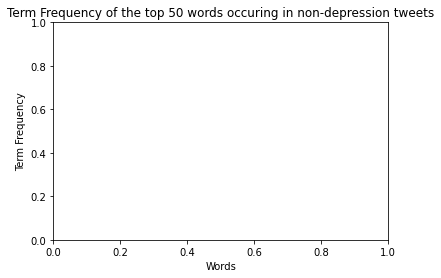

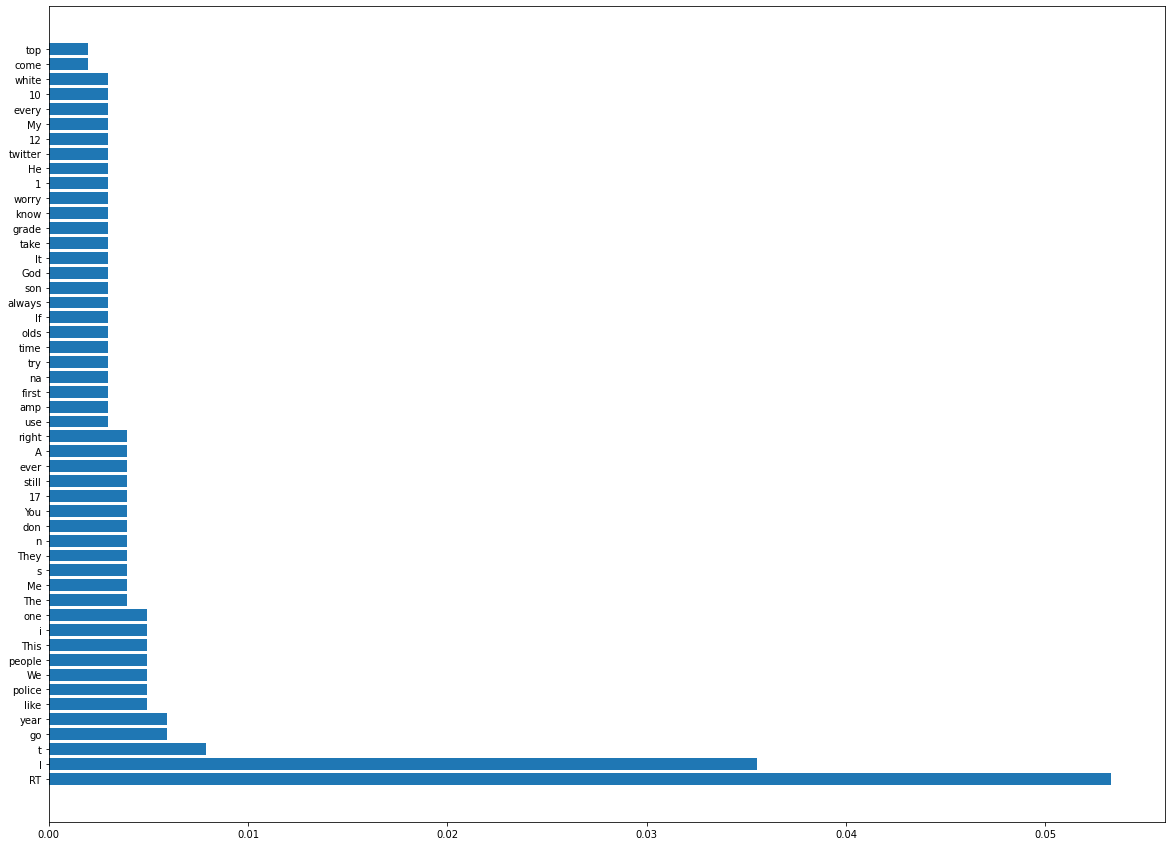

In [0]:
x = list(top50non_depression_tf.keys())
y = list(top50non_depression_tf.values())
plt.xlabel('Words')
plt.ylabel('Term Frequency')
plt.title('Term Frequency of the top 50 words occuring in non-depression tweets')
plt.figure(figsize = (20,15)) 
plt.barh(x, y)

In [0]:
def computeIDF(word_bag, sentence_bag):
  import math
  N = len(sentence_bag)
  DF = {}
  IDF = {}
  df = 0

  for sentence in sentence_bag:
    for word in word_bag:
      if word in sentence:
        df = df + 1
        DF[word] = df
  for word, df in DF.items():
    IDF[word] = math.log((N + 1) / (df + 1))
  return IDF

In [0]:
depressive_idf = computeIDF(depressive_word_bag, depressive_sentence_bag)
depressive_candidate_idf = computeIDF(depressive_candidate_word_bag, depressive_candidate_sentence_bag)
non_depression_idf = computeIDF(non_depression_word_bag, non_depression_sentence_bag)
print(depressive_idf)
print(depressive_candidate_idf)
print(non_depression_idf)
## most of the idfs are minus because these words appear in most of the sentences.
## Thus I am not going to calculate the tf_idf since it won't be that efficient to measure the document frequency of a certain word. 

{'Since': -4.133859580571993, 'I': -6.69953175617568, 'clinically': -6.603840119206662, 'diagnosed': -6.693165599990446, 'depression': -6.681571396255047, 'say': -6.48189742050983, 'going': -6.638627889935495, 'big': -5.697093486505405, 'sad': -6.66210915778443, 'let': -6.5461703415458485, 'tell': -6.374929206315227, 'you': -6.667138528004446, 'RT': -6.626474443534195, 'i': -6.699387234338492, 'm': -6.698689465598508, 'sorry': -5.891700586378313, 're': -6.6936523702792545, 'don': -6.561542903701543, 't': -6.700103355255328, 'go': -6.693083394609741, 'around': -6.536225650545521, 'saying': -6.48281085865278, 'depressed': -6.641761476519699, 'ke': -6.695098639126797, 'need': -6.224204759952487, 'job': -6.550453316350829, 'throug': -5.356152988672407, 'n': -6.698582557108929, 'e': -6.699588302513848, 'depress': -6.678136728399085, 'be': -6.69583044957009, 'at': -6.695319500423645, 'au': -6.693323668269949, 'r': -6.700084516536736, 'u': -6.693608128224646, 'diagnose': -6.69122248146598, 'd

# Calculating Word2Vec for the 3 groups

In [0]:
depressive_and_depressive_candidate_shared_word_bag = []
depressive_data = set(depressive_word_bag)
depressive_candidate_data = set(depressive_candidate_word_bag)
for word in depressive_data:
  if word in depressive_candidate_data:
    depressive_and_depressive_candidate_shared_word_bag.append(word)
print(depressive_and_depressive_candidate_shared_word_bag[0:225])
print(len(depressive_and_depressive_candidate_shared_word_bag))

['i', 'let', 'w', 'cause', 'gon', 't', 'to', 'pretty', 'type', 'the', 'trying', 'talks', 'Its', 'g', 'life', 'too', 'social', 'even', 'na', 'feeling', 'much', 'fuck', 'SO', 'conversation', 'thank', 'used', 'got', 'good', 'people', 'When', 'That', 'always', 'years', 'love', 'person', 'guess', 'fact', 'extreme', 'm', 'amount', 'sleep', 'told', 'It', 'look', 'guys', 'induced', 'ur', 'She', 'ago', 'RT', 'just', 'This', 'afraid', 'I', 'clear', 'shit', 'month', 'wish', 'ta', 'And', 'new', 'Being', 'But', '2', 'energy', 'loss', 'kids', 'wan', 'whole', 'don', 'u', 'depre', 'get', 'longer', 'sport', 'convinced', 'time', 'skin', 'say', 'self', 'sad', 'still', 'major', 's', 'd', 'finally', 'day', 'making', 'died', 'call', 'there', 'U', 'going', 'reading', 'events', 'Let', 'class', 're', 'literally', 'think', 'wonder', 'depress', 'HAPPY', 'li', 'way', 'As', 'form', 'makes', 'future', 'need', 'y', 'break', 'They', 'like', 'im', 'would', 'media', 'made', 'one', 'getting', 'go', 'put', 'you', 'n', 'M

In [0]:
depressive_candidate_unique_word_bag = []
for word in depressive_candidate_data:
  if word not in depressive_data:
    depressive_candidate_unique_word_bag.append(word)
print(depressive_candidate_unique_word_bag[0:225])
print(len(depressive_candidate_unique_word_bag))

['email', 'JOHNACULA', 'lain', 'recession', 'fine', 'ME', 'benefited', 'wth', 'public', 'games', 'proble', 'liquor', 'marijuana', 'GOP', 'AdnanSyed', 'DEPRESS', 'He', 'vote', 'campaign', 'simply', 'MAKES', 'dey', 'Eventho', 'consumer', 'world', 'kene', 'keep', 'impress', 'nine', 'supporting', 'whining', 'Joker', 'AGAIN', 'remnant', 'S', 'express', 'SEASON', 'MORE', 'takyah', 'phase', 'Yep', 'awake', 'declined', 'refrain', 'meaning', 'M', 'bass', 'goes', 'prices', 'gangsta', 'memory', 'videos', 'confidence', 'shack', 'third', 'tho', 'taxin', 'lose', 'outside', 'calendar', 'EPIC', 'stress', 'anyone', 'store', 'online', 'Depress', 'cruel', 'Terf', 'act', 'Miller', 'pun', 'strip', 'YEAH', 'easily', 'recurring', 'absolutely', 'COLLABS', 'posts', 'Cuz', 'season', 'cam', 'nearing', 'useless', 'reminders', 'men', 'Idk', 'pay', 'Big', 'app', 'WANT', 'me', 'election', 'stubborn', 'Imagine', 'dogs', 'acne', 'unfortunately', 'orang', 'Are', 'THIS', 'hopeful', 'suspect', 'FUCKING', 'video', 'Alia',

In [0]:
depressive_and_non_depression_shared_word_bag = []
non_depression_data = set(non_depression_word_bag)
for word in depressive_data:
  if word in non_depression_data:
    depressive_and_non_depression_shared_word_bag.append(word)
print(depressive_and_non_depression_shared_word_bag)
print(len(depressive_and_non_depression_shared_word_bag))

['wit', 'long', 'later', 'i', 'already', 'bed', 'ha', 'let', 'grade', 'girl', 'Met', 'lot', 'care', 'away', 'gon', 'You', 't', 'seeing', 'great', 'left', '2020', 'found', 'Daily', 'In', '30', 'sorry', 'worst', 'God', 'tried', 'child', '1', 'sadness', 'might', 'somewhere', 'killed', 'e', 'took', 'the', 'trying', '12', 'single', 'Why', 'take', '15', 'year', 'than', 'show', 'came', 'know', 'remember', 'in', 'life', 'thing', '16', 'na', 'much', 'SO', 'hard', 'got', 'Thank', 'people', 'Girl', 'insurance', 'always', 'Now', 'love', 'If', 'JUST', 'putting', 'lied', 'person', 'calm', 'seen', '17', 'fucking', 'spend', 'Do', 'fact', 'else', 'America', 'sister', 'So', '2017', 'friend', 'full', 'this', 'best', 'find', 'months', 'It', 'ive', 'use', 'alone', 'RT', 'ever', 'faith', 'Hello', 'This', 'After', 'lol', 'bts', 'I', 'shit', 'feels', 'watch', 'And', 'home', '2019', 'done', 'Please', 'tweet', '2', 'today', 'At', 'post', 'whole', 'bitch', 'light', 'don', 'u', 'hey', 'part', 'understand', 'spent

In [0]:
non_depression_unique_word_bag = []
for word in non_depression_data:
  if word not in depressive_data:
    non_depression_unique_word_bag.append(word)
print(non_depression_unique_word_bag[0:225])
print(len(non_depression_unique_word_bag))

['favorite', 'KANU', 'Carfin', 'reimagine', 'whitest', 'created', 'safe', 'shop', 'red', 'New', 'IF', 'foreheads', 'GOOD', 'IS', 'http', 'He', 'OIC', 'HORRIFIC', 'campaign', 'early', 'The100', 'pains', 'Nnamdi', 'FATHER', 'Korea', 'minors', 'push', 'saimen', 'deputies', 'North', 'Portman', 'following', 'hurts', 'TCK', 'conclusion', 'Anyone', 'BBNaijaReunioun2020', 'Ha', 'TRINDEKA', 'June', 'mayflies', 'Them', 'HANNIBAL', 'fanart', 'casserole', 'FOR', 'Na', 'anyone', 'via', 'Colin', 'Jungkook', 'U0001f929', 'binning', 'voted', 'surprisingly', 'President', 'Niyanta', 'legends', 'mosyankaraoke', 'must', 'sheriff', '𝗐𝗁𝖺𝗍', 'Tulsa', 'olds', 'BY', 'decern', 'Michael', 'recognition', 'kick', 'cops', 'World', 'Wait', 'riot', 'slavery', 'justice', 'clash', 'SHES', 'monkey', 'peak', 'worry', 'assignment', 'facial', 'save', 'U0001f974', 'Shingal', 'knows', '원호', 'Microsoft', 'Sizzler', 'Indians', 'winner', 'radical', 'reachin', 'game', 'honor', 'AKI', 'content', 'become', 'Scouts', 'police', 'lau

In [0]:
import gensim
from gensim.models import Word2Vec
model_depressive_tendency = gensim.models.Word2Vec([depressive_word_bag + depressive_candidate_word_bag + non_depression_word_bag], min_count = 0, size = 100, window = 5)
## calculating w2v in the CBOW(continue bag of words) model 
model_depressive_tendency2 = gensim.models.Word2Vec([depressive_word_bag + depressive_candidate_word_bag + non_depression_word_bag], min_count = 0, size = 100, window = 5, sg = 1)
## calculating w2v in the Skip Gram model 

In [0]:
## Calculate the Cosine similarity between depressive and depressive candidate tweets shared words, and the words which are unique in depressive candidate tweets to figure out the similarity between words of the two group.
print("Cosine similarity between depressive tweets and depressive candidate tweets - CBOW : ", model_depressive_tendency.n_similarity(
    ['i', 'let', 'w', 'cause', 'gon', 't', 'to', 'pretty', 'type', 'the', 'trying', 'talks', 'Its', 'g', 'life', 'too', 'social', 'even', 'na', 'feeling', 'much', 'fuck', 'SO', 'conversation', 'thank', 'used', 'got', 'good', 'people', 'When', 'That', 'always', 'years', 'love', 'person', 'guess', 'fact', 'extreme', 'm', 'amount', 'sleep', 'told', 'It', 'look', 'guys', 'induced', 'ur', 'She', 'ago', 'RT', 'just', 'This', 'afraid', 'I', 'clear', 'shit', 'month', 'wish', 'ta', 'And', 'new', 'Being', 'But', '2', 'energy', 'loss', 'kids', 'wan', 'whole', 'don', 'u', 'depre', 'get', 'longer', 'sport', 'convinced', 'time', 'skin', 'say', 'self', 'sad', 'still', 'major', 's', 'd', 'finally', 'day', 'making', 'died', 'call', 'there', 'U', 'going', 'reading', 'events', 'Let', 'class', 're', 'literally', 'think', 'wonder', 'depress', 'HAPPY', 'li', 'way', 'As', 'form', 'makes', 'future', 'need', 'y', 'break', 'They', 'like', 'im', 'would', 'media', 'made', 'one', 'getting', 'go', 'put', 'you', 'n', 'May', 'why', 'tell', 'harming', 'night', 'never', 'happiness', 'try'], ['email', 'JOHNACULA', 'lain', 'recession', 'fine', 'ME', 'benefited', 'wth', 'public', 'games', 'proble', 'liquor', 'marijuana', 'GOP', 'AdnanSyed', 'DEPRESS', 'He', 'vote', 'campaign', 'simply', 'MAKES', 'dey', 'Eventho', 'consumer', 'world', 'kene', 'keep', 'impress', 'nine', 'supporting', 'whining', 'Joker', 'AGAIN', 'remnant', 'S', 'express', 'SEASON', 'MORE', 'takyah', 'phase', 'Yep', 'awake', 'declined', 'refrain', 'meaning', 'M', 'bass', 'goes', 'prices', 'gangsta', 'memory', 'videos', 'confidence', 'shack', 'third', 'tho', 'taxin', 'lose', 'outside', 'calendar', 'EPIC', 'stress', 'anyone', 'store', 'online', 'Depress', 'cruel', 'Terf', 'act', 'Miller', 'pun', 'strip', 'YEAH', 'easily', 'recurring', 'absolutely', 'COLLABS', 'posts', 'Cuz', 'season', 'cam', 'nearing', 'useless', 'reminders', 'men', 'Idk', 'pay', 'Big', 'app', 'WANT', 'me', 'election', 'stubborn', 'Imagine', 'dogs', 'acne', 'unfortunately', 'orang', 'Are', 'THIS', 'hopeful', 'suspect', 'FUCKING', 'video', 'Alia', 'gak', 'LIKE', 'website', 'Fox', 'accurately', 'sight', 'Netflix', 'Twitter', 'Trump', 'Yup', 'U0001f974', 'chain', 'substantial', 'NINE', 'continued', 'covid19', 'running', 'swear', 'nobody', 'knew', 'These', 'Insomnia', 'WHEN', 'ngan', 'Stay', 'son', 'fr', 'straight', 'jealous', 'cant', 'bitter', 'burning', 'ja', 'journo', '50', 'pushin', 'Sometimes', 'closed', 'allowing', 'recovery', 'showing', 'tiny', 'drunk', 'nearly', 'different', 'coronavirus']))

Cosine similarity between depressive tweets and depressive candidate tweets - CBOW :  0.7384547


In [0]:
## Calculate the Cosine similarity between depressive and non-depression tweets shared words, and the words missing which are unique in non-depression tweets to figure out the similarity between words of the two group.
print("Cosine similarity between depressive tweets and non-depression tweets - CBOW : ", model_depressive_tendency.n_similarity(
    ['wit', 'long', 'later', 'i', 'already', 'bed', 'ha', 'let', 'grade', 'girl', 'Met', 'lot', 'care', 'away', 'gon', 'You', 't', 'seeing', 'great', 'left', '2020', 'found', 'Daily', 'In', '30', 'sorry', 'worst', 'God', 'tried', 'child', '1', 'sadness', 'might', 'somewhere', 'killed', 'e', 'took', 'the', 'trying', '12', 'single', 'Why', 'take', '15', 'year', 'than', 'show', 'came', 'know', 'remember', 'in', 'life', 'thing', '16', 'na', 'much', 'SO', 'hard', 'got', 'Thank', 'people', 'Girl', 'insurance', 'always', 'Now', 'love', 'If', 'JUST', 'putting', 'lied', 'person', 'calm', 'seen', '17', 'fucking', 'spend', 'Do', 'fact', 'else', 'America', 'sister', 'So', '2017', 'friend', 'full', 'this', 'best', 'find', 'months', 'It', 'ive', 'use', 'alone', 'RT', 'ever', 'faith', 'Hello', 'This', 'After', 'lol', 'bts', 'I', 'shit', 'feels', 'watch', 'And', 'home', '2019', 'done', 'Please', 'tweet', '2', 'today', 'At', 'post', 'whole', 'bitch', 'light', 'don', 'u', 'hey', 'part', 'understand', 'spent', 'happened', '3', 'get', 'sport', 'hell', 'so', 'time', 'hate', 'protect', 'problem', 'sad', 'The', 'What', 'music', 'comfortable', 'now', 'thought', 'first', 'still', 'make', '6', 's', 'parents', 'weeks', 'back', 'finally', 'hope', 'better', 'right', 'day', 'BlackLivesMatter', '18', 'Not', 'less', 'twitter', 'Let', 'want', 're', 'also', 'end', 'U0001f928', 'a', 'literally', 'think', 'How', 'b', 'top', 'U0001f97a', 'house', 'way', 'everyone', 'every', 'As', 'read', 'oh', 've', 'co', 'need', 'incident', 'They', 'Lol', 'like', 'im', '4', 'almost', 'true', 'since', 'anymore', 'My', 'would', 'T', 'saying', '10', 'went', 'one', 'All', 'AND', 'started', 'hit', 'Dark', 'songs', 'work', 'go', 'racism', 'A', 'many', 'but', 'see', 'put', 'you', 'n', 'come', 'reach', 'No', 'anything', 'idea', 'why', 'really', 'little', 'amp', 'wait', 'body', 'us', 'feel', 'night', 'and', 'well', 'Me', 'never', 'try'], ['favorite', 'KANU', 'Carfin', 'reimagine', 'whitest', 'created', 'safe', 'shop', 'red', 'New', 'IF', 'foreheads', 'GOOD', 'IS', 'http', 'He', 'OIC', 'HORRIFIC', 'campaign', 'early', 'The100', 'pains', 'Nnamdi', 'FATHER', 'Korea', 'minors', 'push', 'saimen', 'deputies', 'North', 'Portman', 'following', 'hurts', 'TCK', 'conclusion', 'Anyone', 'BBNaijaReunioun2020', 'Ha', 'TRINDEKA', 'June', 'mayflies', 'Them', 'HANNIBAL', 'fanart', 'casserole', 'FOR', 'Na', 'anyone', 'via', 'Colin', 'Jungkook', 'U0001f929', 'binning', 'voted', 'surprisingly', 'President', 'Niyanta', 'legends', 'mosyankaraoke', 'must', 'sheriff', '𝗐𝗁𝖺𝗍', 'Tulsa', 'olds', 'BY', 'decern', 'Michael', 'recognition', 'kick', 'cops', 'World', 'Wait', 'riot', 'slavery', 'justice', 'clash', 'SHES', 'monkey', 'peak', 'worry', 'assignment', 'facial', 'save', 'U0001f974', 'Shingal', 'knows', '원호', 'Microsoft', 'Sizzler', 'Indians', 'winner', 'radical', 'reachin', 'game', 'honor', 'AKI', 'content', 'become', 'Scouts', 'police', 'launch', 'rockville', 'prizes', 'mfs', 'Namibia', 'needs', 'windshield', 'Lourdes', 'Black', 'brings', 'relationships', 'Every', 'lying', 'modernity', 'shuffle', 'nearly', 'white', 'Bideo', 'finall', 'worked', 'different', 'we', 'Right', '𝐆𝐑𝐈𝐅𝐅𝐈𝐍', '𝐌𝐀𝐑𝐈𝐋𝐘𝐍', 'book', 'jyp', 'race', 'ME', 'similar', 'whether', 'Experience', 'baekhyun', 'southern', 'Breonna', 'Follow', 'hewwooo', 'Wall', 'BlackOnBlackCrimes', 'follow', '1½', 'humor', 'prem', 'colors', 'diamonds', 'VE', 'ANY', 'naa', 'agreeable', 'Alberta', 'enter', 'jump', 'Drumpf', 'escorted', 'statement', 'Hall', 'buy', 'centre', 'touched', 'nails', 'shows', 'Correct', 'creative', 'baekhyunfanart', 'hardest', 'Sleeping', 'Hanover', 'Navy', 'scout', 'March', 'bh', 'Wow', 'PHOTO', 'graham', 'ooo', 'Msmd', 'predict', 'least', 'medical', '5th', 'merch', 'company', 'kneel', 'Pyro', 'respect', 'forget', 'by', 'z6rV6RCSUg', 'Loreto', 'tech', 'Come', 'ASKED', 'Im', 'survey', 'pay', 'exploded', 'bans', 'INSANE', 'h8', 'LMAO', 'NO', 'as', 'doubt', 'history', 'kn', 'naso', 'blonde', 'NTA', 'ctivate', 'mess', 'blue', 'StormWatcher', 'special', 'wasabi', 'HATE', 'luke', 'viol', 'girls', 'mayfly', 'wednesdaywisdom', 'There', 'crawfish', 'reasons', 'are', '𝐃𝐈𝐀𝐍𝐀']))

Cosine similarity between depressive tweets and non-depression tweets - CBOW :  0.78368175


In [0]:
## Calculate the Cosine similarity between depressive and depressive candidate tweets shared words, and the words which are unique in depressive candidate tweets to figure out the similarity between words of the two group.
print("Cosine similarity between depressive tweets and depressive candidate tweets - Skip Gram : ", model_depressive_tendency2.n_similarity(
     ['i', 'let', 'w', 'cause', 'gon', 't', 'to', 'pretty', 'type', 'the', 'trying', 'talks', 'Its', 'g', 'life', 'too', 'social', 'even', 'na', 'feeling', 'much', 'fuck', 'SO', 'conversation', 'thank', 'used', 'got', 'good', 'people', 'When', 'That', 'always', 'years', 'love', 'person', 'guess', 'fact', 'extreme', 'm', 'amount', 'sleep', 'told', 'It', 'look', 'guys', 'induced', 'ur', 'She', 'ago', 'RT', 'just', 'This', 'afraid', 'I', 'clear', 'shit', 'month', 'wish', 'ta', 'And', 'new', 'Being', 'But', '2', 'energy', 'loss', 'kids', 'wan', 'whole', 'don', 'u', 'depre', 'get', 'longer', 'sport', 'convinced', 'time', 'skin', 'say', 'self', 'sad', 'still', 'major', 's', 'd', 'finally', 'day', 'making', 'died', 'call', 'there', 'U', 'going', 'reading', 'events', 'Let', 'class', 're', 'literally', 'think', 'wonder', 'depress', 'HAPPY', 'li', 'way', 'As', 'form', 'makes', 'future', 'need', 'y', 'break', 'They', 'like', 'im', 'would', 'media', 'made', 'one', 'getting', 'go', 'put', 'you', 'n', 'May', 'why', 'tell', 'harming', 'night', 'never', 'happiness', 'try'], ['email', 'JOHNACULA', 'lain', 'recession', 'fine', 'ME', 'benefited', 'wth', 'public', 'games', 'proble', 'liquor', 'marijuana', 'GOP', 'AdnanSyed', 'DEPRESS', 'He', 'vote', 'campaign', 'simply', 'MAKES', 'dey', 'Eventho', 'consumer', 'world', 'kene', 'keep', 'impress', 'nine', 'supporting', 'whining', 'Joker', 'AGAIN', 'remnant', 'S', 'express', 'SEASON', 'MORE', 'takyah', 'phase', 'Yep', 'awake', 'declined', 'refrain', 'meaning', 'M', 'bass', 'goes', 'prices', 'gangsta', 'memory', 'videos', 'confidence', 'shack', 'third', 'tho', 'taxin', 'lose', 'outside', 'calendar', 'EPIC', 'stress', 'anyone', 'store', 'online', 'Depress', 'cruel', 'Terf', 'act', 'Miller', 'pun', 'strip', 'YEAH', 'easily', 'recurring', 'absolutely', 'COLLABS', 'posts', 'Cuz', 'season', 'cam', 'nearing', 'useless', 'reminders', 'men', 'Idk', 'pay', 'Big', 'app', 'WANT', 'me', 'election', 'stubborn', 'Imagine', 'dogs', 'acne', 'unfortunately', 'orang', 'Are', 'THIS', 'hopeful', 'suspect', 'FUCKING', 'video', 'Alia', 'gak', 'LIKE', 'website', 'Fox', 'accurately', 'sight', 'Netflix', 'Twitter', 'Trump', 'Yup', 'U0001f974', 'chain', 'substantial', 'NINE', 'continued', 'covid19', 'running', 'swear', 'nobody', 'knew', 'These', 'Insomnia', 'WHEN', 'ngan', 'Stay', 'son', 'fr', 'straight', 'jealous', 'cant', 'bitter', 'burning', 'ja', 'journo', '50', 'pushin', 'Sometimes', 'closed', 'allowing', 'recovery', 'showing', 'tiny', 'drunk', 'nearly', 'different', 'coronavirus']
))

Cosine similarity between depressive tweets and depressive candidate tweets - Skip Gram :  0.99976104


In [0]:
## Calculate the Cosine similarity between depressive and non-depression tweets shared words, and the words which are unique in non-depression tweets to figure out the similarity between words of the two group.
print("Cosine similarity between depressive tweets and non-depression tweets - Skip Gram : ", model_depressive_tendency2.n_similarity(
    ['wit', 'long', 'later', 'i', 'already', 'bed', 'ha', 'let', 'grade', 'girl', 'Met', 'lot', 'care', 'away', 'gon', 'You', 't', 'seeing', 'great', 'left', '2020', 'found', 'Daily', 'In', '30', 'sorry', 'worst', 'God', 'tried', 'child', '1', 'sadness', 'might', 'somewhere', 'killed', 'e', 'took', 'the', 'trying', '12', 'single', 'Why', 'take', '15', 'year', 'than', 'show', 'came', 'know', 'remember', 'in', 'life', 'thing', '16', 'na', 'much', 'SO', 'hard', 'got', 'Thank', 'people', 'Girl', 'insurance', 'always', 'Now', 'love', 'If', 'JUST', 'putting', 'lied', 'person', 'calm', 'seen', '17', 'fucking', 'spend', 'Do', 'fact', 'else', 'America', 'sister', 'So', '2017', 'friend', 'full', 'this', 'best', 'find', 'months', 'It', 'ive', 'use', 'alone', 'RT', 'ever', 'faith', 'Hello', 'This', 'After', 'lol', 'bts', 'I', 'shit', 'feels', 'watch', 'And', 'home', '2019', 'done', 'Please', 'tweet', '2', 'today', 'At', 'post', 'whole', 'bitch', 'light', 'don', 'u', 'hey', 'part', 'understand', 'spent', 'happened', '3', 'get', 'sport', 'hell', 'so', 'time', 'hate', 'protect', 'problem', 'sad', 'The', 'What', 'music', 'comfortable', 'now', 'thought', 'first', 'still', 'make', '6', 's', 'parents', 'weeks', 'back', 'finally', 'hope', 'better', 'right', 'day', 'BlackLivesMatter', '18', 'Not', 'less', 'twitter', 'Let', 'want', 're', 'also', 'end', 'U0001f928', 'a', 'literally', 'think', 'How', 'b', 'top', 'U0001f97a', 'house', 'way', 'everyone', 'every', 'As', 'read', 'oh', 've', 'co', 'need', 'incident', 'They', 'Lol', 'like', 'im', '4', 'almost', 'true', 'since', 'anymore', 'My', 'would', 'T', 'saying', '10', 'went', 'one', 'All', 'AND', 'started', 'hit', 'Dark', 'songs', 'work', 'go', 'racism', 'A', 'many', 'but', 'see', 'put', 'you', 'n', 'come', 'reach', 'No', 'anything', 'idea', 'why', 'really', 'little', 'amp', 'wait', 'body', 'us', 'feel', 'night', 'and', 'well', 'Me', 'never', 'try'], ['favorite', 'KANU', 'Carfin', 'reimagine', 'whitest', 'created', 'safe', 'shop', 'red', 'New', 'IF', 'foreheads', 'GOOD', 'IS', 'http', 'He', 'OIC', 'HORRIFIC', 'campaign', 'early', 'The100', 'pains', 'Nnamdi', 'FATHER', 'Korea', 'minors', 'push', 'saimen', 'deputies', 'North', 'Portman', 'following', 'hurts', 'TCK', 'conclusion', 'Anyone', 'BBNaijaReunioun2020', 'Ha', 'TRINDEKA', 'June', 'mayflies', 'Them', 'HANNIBAL', 'fanart', 'casserole', 'FOR', 'Na', 'anyone', 'via', 'Colin', 'Jungkook', 'U0001f929', 'binning', 'voted', 'surprisingly', 'President', 'Niyanta', 'legends', 'mosyankaraoke', 'must', 'sheriff', '𝗐𝗁𝖺𝗍', 'Tulsa', 'olds', 'BY', 'decern', 'Michael', 'recognition', 'kick', 'cops', 'World', 'Wait', 'riot', 'slavery', 'justice', 'clash', 'SHES', 'monkey', 'peak', 'worry', 'assignment', 'facial', 'save', 'U0001f974', 'Shingal', 'knows', '원호', 'Microsoft', 'Sizzler', 'Indians', 'winner', 'radical', 'reachin', 'game', 'honor', 'AKI', 'content', 'become', 'Scouts', 'police', 'launch', 'rockville', 'prizes', 'mfs', 'Namibia', 'needs', 'windshield', 'Lourdes', 'Black', 'brings', 'relationships', 'Every', 'lying', 'modernity', 'shuffle', 'nearly', 'white', 'Bideo', 'finall', 'worked', 'different', 'we', 'Right', '𝐆𝐑𝐈𝐅𝐅𝐈𝐍', '𝐌𝐀𝐑𝐈𝐋𝐘𝐍', 'book', 'jyp', 'race', 'ME', 'similar', 'whether', 'Experience', 'baekhyun', 'southern', 'Breonna', 'Follow', 'hewwooo', 'Wall', 'BlackOnBlackCrimes', 'follow', '1½', 'humor', 'prem', 'colors', 'diamonds', 'VE', 'ANY', 'naa', 'agreeable', 'Alberta', 'enter', 'jump', 'Drumpf', 'escorted', 'statement', 'Hall', 'buy', 'centre', 'touched', 'nails', 'shows', 'Correct', 'creative', 'baekhyunfanart', 'hardest', 'Sleeping', 'Hanover', 'Navy', 'scout', 'March', 'bh', 'Wow', 'PHOTO', 'graham', 'ooo', 'Msmd', 'predict', 'least', 'medical', '5th', 'merch', 'company', 'kneel', 'Pyro', 'respect', 'forget', 'by', 'z6rV6RCSUg', 'Loreto', 'tech', 'Come', 'ASKED', 'Im', 'survey', 'pay', 'exploded', 'bans', 'INSANE', 'h8', 'LMAO', 'NO', 'as', 'doubt', 'history', 'kn', 'naso', 'blonde', 'NTA', 'ctivate', 'mess', 'blue', 'StormWatcher', 'special', 'wasabi', 'HATE', 'luke', 'viol', 'girls', 'mayfly', 'wednesdaywisdom', 'There', 'crawfish', 'reasons', 'are', '𝐃𝐈𝐀𝐍𝐀']))

Cosine similarity between depressive tweets and non-depression tweets - Skip Gram :  0.9998525


# Calculate the sentence length of the three groups

In [0]:
depressive_sentence_length = []
for sentence in depressive_sentence_bag:
  sent_length = len(sentence)
  depressive_sentence_length.append(sent_length)
depressive_sentence_length_mean = np.mean(depressive_sentence_length)
print(depressive_sentence_length)
print(depressive_sentence_length_mean)

[264, 57, 694, 97, 47, 375, 281, 610, 188, 164, 250, 47, 302, 20, 34, 69, 60, 41, 88, 174, 185, 111, 60, 86, 231, 117, 97, 12, 43, 172, 133, 93, 91, 41, 216, 93, 49, 63, 108, 44, 240, 388, 84, 122, 36, 172, 24, 21, 76, 116, 55, 708, 59, 91, 103, 177, 1042, 17, 11, 113, 88, 137, 98, 40, 415, 275, 44, 239, 217, 99, 19, 146, 176, 91, 30, 173, 32, 121, 643, 111, 181, 39, 76, 47, 230, 15, 22, 295, 55, 88, 34, 212, 164, 61, 40, 62, 144, 545, 59, 69, 36, 98, 15, 8, 11, 914, 46, 74, 84, 230, 311, 207, 350, 70, 128, 91, 132, 290, 121, 59, 36, 340, 156, 59, 47, 85, 195, 57, 208, 419, 307, 172, 80, 119, 209, 368, 423, 48, 18, 227, 34, 72, 254, 3, 105, 26, 54, 82, 301, 20, 70, 5, 126, 828, 932, 146, 40, 130, 18, 131, 119, 288, 92, 158, 48, 46, 897, 346, 239, 237, 45, 144, 159, 114, 174, 283, 9, 117, 88, 36, 120, 197, 151, 421, 44, 151, 616, 53, 32, 63, 306, 45, 37, 127, 15]
161.21025641025642


In [0]:
depressive_candidate_sentence_length = []
for sentence in depressive_candidate_sentence_bag:
  sent_length = len(sentence)
  depressive_candidate_sentence_length.append(sent_length)
depressive_candidate_sentence_length_mean = np.mean(depressive_candidate_sentence_length)
print(depressive_candidate_sentence_length_mean)

113.46428571428571


In [0]:
non_depression_sentence_length = []
for sentence in non_depression_sentence_bag:
  sent_length = len(sentence)
  non_depression_sentence_length.append(sent_length)
non_depression_sentence_length_mean = np.mean(non_depression_sentence_length)
print(non_depression_sentence_length_mean)

128.82539682539684


# PoS tagging of the three groups

In [0]:
tags = set(['CC', 'CD', 'DT', 'FW', 'IN', 'JJ', 'JJR', 'MD', 'NN', 'NNS', 'NNP', 'NNPS', 'PDT', 'POS', 'PRP', 'PRP$', 'RB', 'RBR', 'RBS', 'RP', 'TO', 'UH', 'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ', 'WDT', 'WP', 'WP$', 'WRB'])
depressive_pos_tags = dict(nltk.pos_tag(depressive_word_bag))
depressive_candidate_pos_tags = dict(nltk.pos_tag(depressive_candidate_word_bag))
non_depression_pos_tags = dict(nltk.pos_tag(non_depression_word_bag))
print(depressive_pos_tags)
print(depressive_candidate_pos_tags)
print(non_depression_pos_tags)

{'Since': 'IN', 'I': 'PRP', 'clinically': 'RB', 'diagnosed': 'JJ', 'depression': 'NN', 'say': 'VBP', 'going': 'VBG', 'big': 'JJ', 'sad': 'JJ', 'let': 'NN', 'tell': 'NN', 'you': 'PRP', 'RT': 'NNP', 'i': 'NN', 'm': 'VB', 'sorry': 'VBP', 're': 'NN', 'don': 'VBP', 't': 'NNS', 'go': 'VBP', 'around': 'RB', 'saying': 'VBG', 'depressed': 'VBD', 'ke': 'NN', 'need': 'VBP', 'job': 'NN', 'basically': 'RB', '20': 'CD', 'next': 'JJ', 'credible': 'JJ', 'experience': 'VB', 'dropped': 'VBD', 'high': 'JJ', 'school': 'NN', 'mid': 'JJ', 'way': 'NN', 'throug': 'JJ', 'family': 'NN', 'treated': 'VBD', 'still': 'RB', 'talks': 'NNS', 'mom': 'JJ', 'reason': 'NN', 'n': 'RB', 'love': 'VBP', 'With': 'IN', 'e': 'JJ', 'girl': 'JJ', 'Mom': 'NNP', 'took': 'VBD', 'haven': 'VBP', 'kind': 'NN', 'mental': 'JJ', 'illness': 'NN', 'reading': 'VBG', 'Gaga': 'NNP', 'Daily': 'NNP', 'threads': 'NNS', 'make': 'VB', 'feel': 'VBP', 'like': 'IN', 'whenever': 'WRB', 'someone': 'NN', 'makes': 'VBZ', 'mean': 'JJ', 'comment': 'NN', 'ocd

In [0]:
def get_key (dict, value):
    return [k for k, v in dict.items() if v == value]

In [0]:
depressive_CC_words = get_key(depressive_pos_tags, 'CC')
depressive_CD_words = get_key(depressive_pos_tags, 'CD')
depressive_DT_words = get_key(depressive_pos_tags, 'DT')
depressive_FW_words = get_key(depressive_pos_tags, 'FW')
depressive_IN_words = get_key(depressive_pos_tags, 'IN')
depressive_JJ_words = get_key(depressive_pos_tags, 'JJ')
depressive_JJR_words = get_key(depressive_pos_tags, 'JJR')
depressive_MD_words = get_key(depressive_pos_tags, 'MD')
depressive_NN_words = get_key(depressive_pos_tags, 'NN')
depressive_NNS_words = get_key(depressive_pos_tags, 'NNS')
depressive_NNP_words = get_key(depressive_pos_tags, 'NNP')
depressive_NNPS_words = get_key(depressive_pos_tags, 'NNPS')
depressive_PDT_words = get_key(depressive_pos_tags, 'PDT')
depressive_POS_words = get_key(depressive_pos_tags, 'POS')
depressive_PRP_words = get_key(depressive_pos_tags, 'PRP')
depressive_PRPS_words = get_key(depressive_pos_tags, 'PRPS')
depressive_RB_words = get_key(depressive_pos_tags, 'RB')
depressive_RBR_words = get_key(depressive_pos_tags, 'RBR')
depressive_RBS_words = get_key(depressive_pos_tags, 'RBS')
depressive_RP_words = get_key(depressive_pos_tags, 'RP')
depressive_TO_words = get_key(depressive_pos_tags, 'TO')
depressive_UH_words = get_key(depressive_pos_tags, 'UH')
depressive_VB_words = get_key(depressive_pos_tags, 'VB')
depressive_VBD_words = get_key(depressive_pos_tags, 'VBD')
depressive_VBG_words = get_key(depressive_pos_tags, 'VBG')
depressive_VBN_words = get_key(depressive_pos_tags, 'VBN')
depressive_VBP_words = get_key(depressive_pos_tags, 'VBP')
depressive_VBZ_words = get_key(depressive_pos_tags, 'VBZ')
depressive_WDT_words = get_key(depressive_pos_tags, 'WDT')
depressive_WP_words = get_key(depressive_pos_tags, 'WP')
depressive_WPS_words = get_key(depressive_pos_tags, 'WPS')
depressive_WRB_words = get_key(depressive_pos_tags, 'WRB')

num_depressive_CC_words = len(depressive_CC_words)
num_depressive_CD_words = len(depressive_CD_words)
num_depressive_DT_words = len(depressive_DT_words)
num_depressive_FW_words = len(depressive_FW_words)
num_depressive_IN_words = len(depressive_IN_words)
num_depressive_JJ_words = len(depressive_JJ_words)
num_depressive_JJR_words = len(depressive_JJR_words)
num_depressive_MD_words = len(depressive_MD_words)
num_depressive_NN_words = len(depressive_NN_words)
num_depressive_NNS_words = len(depressive_NNS_words)
num_depressive_NNP_words = len(depressive_NNP_words)
num_depressive_NNPS_words = len(depressive_NNPS_words)
num_depressive_PDT_words = len(depressive_PDT_words)
num_depressive_POS_words = len(depressive_POS_words)
num_depressive_PRP_words = len(depressive_PRP_words)
num_depressive_PRPS_words = len(depressive_PRPS_words)
num_depressive_RB_words = len(depressive_RB_words)
num_depressive_RBR_words = len(depressive_RBR_words)
num_depressive_RBS_words = len(depressive_RBS_words)
num_depressive_RP_words = len(depressive_RP_words)
num_depressive_TO_words = len(depressive_TO_words)
num_depressive_UH_words = len(depressive_UH_words)
num_depressive_VB_words = len(depressive_VB_words)
num_depressive_VBD_words = len(depressive_VBD_words)
num_depressive_VBG_words = len(depressive_VBG_words)
num_depressive_VBN_words = len(depressive_VBN_words)
num_depressive_VBP_words = len(depressive_VBP_words)
num_depressive_VBZ_words = len(depressive_VBZ_words)
num_depressive_WDT_words = len(depressive_WDT_words)
num_depressive_WP_words = len(depressive_WP_words)
num_depressive_WPS_words = len(depressive_WPS_words)
num_depressive_WRB_words = len(depressive_WRB_words)

depressive_pos_sum = {'CC': num_depressive_CC_words/238,
            'CD': num_depressive_CD_words/238, 
            'DT': num_depressive_DT_words/238, 
            'FW': num_depressive_FW_words/238, 
            'IN': num_depressive_IN_words/238, 
            'JJ': num_depressive_JJ_words/238, 
            'JJR': num_depressive_JJR_words/238, 
            'MD': num_depressive_MD_words/238, 
            'NN': num_depressive_NN_words/238, 
            'NNS': num_depressive_NNS_words/238, 
            'NNP': num_depressive_NNP_words/238, 
            'NNPS': num_depressive_NNPS_words/238, 
            'PDT': num_depressive_PDT_words/238, 
            'POS': num_depressive_POS_words/238, 
            'PRP': num_depressive_PRP_words/238, 
            'PRP$': num_depressive_PRPS_words/238, 
            'RB': num_depressive_RB_words/238, 
            'RBR': num_depressive_RBR_words/238, 
            'RBS': num_depressive_RBS_words/238, 
            'RP': num_depressive_RP_words/238, 
            'TO': num_depressive_TO_words/238, 
            'UH': num_depressive_UH_words/238, 
            'VB': num_depressive_VB_words/238, 
            'VBD': num_depressive_VBD_words/238, 
            'VBG': num_depressive_VBG_words/238, 
            'VBN': num_depressive_VBN_words/238, 
            'VBP': num_depressive_VBP_words/238, 
            'VBZ': num_depressive_VBZ_words/238, 
            'WDT': num_depressive_WDT_words/238, 
            'WP': num_depressive_WP_words/238, 
            'WP$': num_depressive_WPS_words/238, 
            'WRB': num_depressive_WRB_words/238}
print(depressive_pos_sum)

{'CC': 0.029411764705882353, 'CD': 0.21008403361344538, 'DT': 0.046218487394957986, 'FW': 0.004201680672268907, 'IN': 0.1722689075630252, 'JJ': 0.819327731092437, 'JJR': 0.012605042016806723, 'MD': 0.025210084033613446, 'NN': 1.23109243697479, 'NNS': 0.31512605042016806, 'NNP': 0.7857142857142857, 'NNPS': 0.008403361344537815, 'PDT': 0.0, 'POS': 0.0, 'PRP': 0.046218487394957986, 'PRP$': 0.0, 'RB': 0.3697478991596639, 'RBR': 0.01680672268907563, 'RBS': 0.0, 'RP': 0.01680672268907563, 'TO': 0.012605042016806723, 'UH': 0.004201680672268907, 'VB': 0.13445378151260504, 'VBD': 0.33613445378151263, 'VBG': 0.2815126050420168, 'VBN': 0.1134453781512605, 'VBP': 0.37815126050420167, 'VBZ': 0.06722689075630252, 'WDT': 0.0, 'WP': 0.008403361344537815, 'WP$': 0.0, 'WRB': 0.025210084033613446}


In [0]:
depressive_candidate_CC_words = get_key(depressive_candidate_pos_tags, 'CC')
depressive_candidate_CD_words = get_key(depressive_candidate_pos_tags, 'CD')
depressive_candidate_DT_words = get_key(depressive_candidate_pos_tags, 'DT')
depressive_candidate_FW_words = get_key(depressive_candidate_pos_tags, 'FW')
depressive_candidate_IN_words = get_key(depressive_candidate_pos_tags, 'IN')
depressive_candidate_JJ_words = get_key(depressive_candidate_pos_tags, 'JJ')
depressive_candidate_JJR_words = get_key(depressive_candidate_pos_tags, 'JJR')
depressive_candidate_MD_words = get_key(depressive_candidate_pos_tags, 'MD')
depressive_candidate_NN_words = get_key(depressive_candidate_pos_tags, 'NN')
depressive_candidate_NNS_words = get_key(depressive_candidate_pos_tags, 'NNS')
depressive_candidate_NNP_words = get_key(depressive_candidate_pos_tags, 'NNP')
depressive_candidate_NNPS_words = get_key(depressive_candidate_pos_tags, 'NNPS')
depressive_candidate_PDT_words = get_key(depressive_candidate_pos_tags, 'PDT')
depressive_candidate_POS_words = get_key(depressive_candidate_pos_tags, 'POS')
depressive_candidate_PRP_words = get_key(depressive_candidate_pos_tags, 'PRP')
depressive_candidate_PRPS_words = get_key(depressive_candidate_pos_tags, 'PRPS')
depressive_candidate_RB_words = get_key(depressive_candidate_pos_tags, 'RB')
depressive_candidate_RBR_words = get_key(depressive_candidate_pos_tags, 'RBR')
depressive_candidate_RBS_words = get_key(depressive_candidate_pos_tags, 'RBS')
depressive_candidate_RP_words = get_key(depressive_candidate_pos_tags, 'RP')
depressive_candidate_TO_words = get_key(depressive_candidate_pos_tags, 'TO')
depressive_candidate_UH_words = get_key(depressive_candidate_pos_tags, 'UH')
depressive_candidate_VB_words = get_key(depressive_candidate_pos_tags, 'VB')
depressive_candidate_VBD_words = get_key(depressive_candidate_pos_tags, 'VBD')
depressive_candidate_VBG_words = get_key(depressive_candidate_pos_tags, 'VBG')
depressive_candidate_VBN_words = get_key(depressive_candidate_pos_tags, 'VBN')
depressive_candidate_VBP_words = get_key(depressive_candidate_pos_tags, 'VBP')
depressive_candidate_VBZ_words = get_key(depressive_candidate_pos_tags, 'VBZ')
depressive_candidate_WDT_words = get_key(depressive_candidate_pos_tags, 'WDT')
depressive_candidate_WP_words = get_key(depressive_candidate_pos_tags, 'WP')
depressive_candidate_WPS_words = get_key(depressive_candidate_pos_tags, 'WPS')
depressive_candidate_WRB_words = get_key(depressive_candidate_pos_tags, 'WRB')

num_depressive_candidate_CC_words = len(depressive_candidate_CC_words)
num_depressive_candidate_CD_words = len(depressive_candidate_CD_words)
num_depressive_candidate_DT_words = len(depressive_candidate_DT_words)
num_depressive_candidate_FW_words = len(depressive_candidate_FW_words)
num_depressive_candidate_IN_words = len(depressive_candidate_IN_words)
num_depressive_candidate_JJ_words = len(depressive_candidate_JJ_words)
num_depressive_candidate_JJR_words = len(depressive_candidate_JJR_words)
num_depressive_candidate_MD_words = len(depressive_candidate_MD_words)
num_depressive_candidate_NN_words = len(depressive_candidate_NN_words)
num_depressive_candidate_NNS_words = len(depressive_candidate_NNS_words)
num_depressive_candidate_NNP_words = len(depressive_candidate_NNP_words)
num_depressive_candidate_NNPS_words = len(depressive_candidate_NNPS_words)
num_depressive_candidate_PDT_words = len(depressive_candidate_PDT_words)
num_depressive_candidate_POS_words = len(depressive_candidate_POS_words)
num_depressive_candidate_PRP_words = len(depressive_candidate_PRP_words)
num_depressive_candidate_PRPS_words = len(depressive_candidate_PRPS_words)
num_depressive_candidate_RB_words = len(depressive_candidate_RB_words)
num_depressive_candidate_RBR_words = len(depressive_candidate_RBR_words)
num_depressive_candidate_RBS_words = len(depressive_candidate_RBS_words)
num_depressive_candidate_RP_words = len(depressive_candidate_RP_words)
num_depressive_candidate_TO_words = len(depressive_candidate_TO_words)
num_depressive_candidate_UH_words = len(depressive_candidate_UH_words)
num_depressive_candidate_VB_words = len(depressive_candidate_VB_words)
num_depressive_candidate_VBD_words = len(depressive_candidate_VBD_words)
num_depressive_candidate_VBG_words = len(depressive_candidate_VBG_words)
num_depressive_candidate_VBN_words = len(depressive_candidate_VBN_words)
num_depressive_candidate_VBP_words = len(depressive_candidate_VBP_words)
num_depressive_candidate_VBZ_words = len(depressive_candidate_VBZ_words)
num_depressive_candidate_WDT_words = len(depressive_candidate_WDT_words)
num_depressive_candidate_WP_words = len(depressive_candidate_WP_words)
num_depressive_candidate_WPS_words = len(depressive_candidate_WPS_words)
num_depressive_candidate_WRB_words = len(depressive_candidate_WRB_words)

depressive_candidate_pos_sum = {'CC': num_depressive_candidate_CC_words/43,
            'CD': num_depressive_candidate_CD_words/43, 
            'DT': num_depressive_candidate_DT_words/43, 
            'FW': num_depressive_candidate_FW_words/43, 
            'IN': num_depressive_candidate_IN_words/43, 
            'JJ': num_depressive_candidate_JJ_words/43, 
            'JJR': num_depressive_candidate_JJR_words/43, 
            'MD': num_depressive_candidate_MD_words/43, 
            'NN': num_depressive_candidate_NN_words/43, 
            'NNS': num_depressive_candidate_NNS_words/43, 
            'NNP': num_depressive_candidate_NNP_words/43, 
            'NNPS': num_depressive_candidate_NNPS_words/43, 
            'PDT': num_depressive_candidate_PDT_words/43, 
            'POS': num_depressive_candidate_POS_words/43, 
            'PRP': num_depressive_candidate_PRP_words/43, 
            'PRP$': num_depressive_candidate_PRPS_words/43, 
            'RB': num_depressive_candidate_RB_words/43, 
            'RBR': num_depressive_candidate_RBR_words/43, 
            'RBS': num_depressive_candidate_RBS_words/43, 
            'RP': num_depressive_candidate_RP_words/43, 
            'TO': num_depressive_candidate_TO_words/43, 
            'UH': num_depressive_candidate_UH_words/43, 
            'VB': num_depressive_candidate_VB_words/43, 
            'VBD': num_depressive_candidate_VBD_words/43, 
            'VBG': num_depressive_candidate_VBG_words/43, 
            'VBN': num_depressive_candidate_VBN_words/43, 
            'VBP': num_depressive_candidate_VBP_words/43, 
            'VBZ': num_depressive_candidate_VBZ_words/43, 
            'WDT': num_depressive_candidate_WDT_words/43, 
            'WP': num_depressive_candidate_WP_words/43, 
            'WP$': num_depressive_candidate_WPS_words/43, 
            'WRB': num_depressive_candidate_WRB_words/43}
print(depressive_candidate_pos_sum)

{'CC': 0.046511627906976744, 'CD': 0.09302325581395349, 'DT': 0.06976744186046512, 'FW': 0.0, 'IN': 0.11627906976744186, 'JJ': 1.1162790697674418, 'JJR': 0.023255813953488372, 'MD': 0.023255813953488372, 'NN': 1.6511627906976745, 'NNS': 0.32558139534883723, 'NNP': 1.0, 'NNPS': 0.0, 'PDT': 0.0, 'POS': 0.0, 'PRP': 0.18604651162790697, 'PRP$': 0.0, 'RB': 0.3953488372093023, 'RBR': 0.0, 'RBS': 0.0, 'RP': 0.0, 'TO': 0.046511627906976744, 'UH': 0.0, 'VB': 0.13953488372093023, 'VBD': 0.3023255813953488, 'VBG': 0.32558139534883723, 'VBN': 0.023255813953488372, 'VBP': 0.5348837209302325, 'VBZ': 0.046511627906976744, 'WDT': 0.023255813953488372, 'WP': 0.0, 'WP$': 0.0, 'WRB': 0.046511627906976744}


In [0]:
non_depression_CC_words = get_key(non_depression_pos_tags, 'CC')
non_depression_CD_words = get_key(non_depression_pos_tags, 'CD')
non_depression_DT_words = get_key(non_depression_pos_tags, 'DT')
non_depression_FW_words = get_key(non_depression_pos_tags, 'FW')
non_depression_IN_words = get_key(non_depression_pos_tags, 'IN')
non_depression_JJ_words = get_key(non_depression_pos_tags, 'JJ')
non_depression_JJR_words = get_key(non_depression_pos_tags, 'JJR')
non_depression_MD_words = get_key(non_depression_pos_tags, 'MD')
non_depression_NN_words = get_key(non_depression_pos_tags, 'NN')
non_depression_NNS_words = get_key(non_depression_pos_tags, 'NNS')
non_depression_NNP_words = get_key(non_depression_pos_tags, 'NNP')
non_depression_NNPS_words = get_key(non_depression_pos_tags, 'NNPS')
non_depression_PDT_words = get_key(non_depression_pos_tags, 'PDT')
non_depression_POS_words = get_key(non_depression_pos_tags, 'POS')
non_depression_PRP_words = get_key(non_depression_pos_tags, 'PRP')
non_depression_PRPS_words = get_key(non_depression_pos_tags, 'PRPS')
non_depression_RB_words = get_key(non_depression_pos_tags, 'RB')
non_depression_RBR_words = get_key(non_depression_pos_tags, 'RBR')
non_depression_RBS_words = get_key(non_depression_pos_tags, 'RBS')
non_depression_RP_words = get_key(non_depression_pos_tags, 'RP')
non_depression_TO_words = get_key(non_depression_pos_tags, 'TO')
non_depression_UH_words = get_key(non_depression_pos_tags, 'UH')
non_depression_VB_words = get_key(non_depression_pos_tags, 'VB')
non_depression_VBD_words = get_key(non_depression_pos_tags, 'VBD')
non_depression_VBG_words = get_key(non_depression_pos_tags, 'VBG')
non_depression_VBN_words = get_key(non_depression_pos_tags, 'VBN')
non_depression_VBP_words = get_key(non_depression_pos_tags, 'VBP')
non_depression_VBZ_words = get_key(non_depression_pos_tags, 'VBZ')
non_depression_WDT_words = get_key(non_depression_pos_tags, 'WDT')
non_depression_WP_words = get_key(non_depression_pos_tags, 'WP')
non_depression_WPS_words = get_key(non_depression_pos_tags, 'WPS')
non_depression_WRB_words = get_key(non_depression_pos_tags, 'WRB')

num_non_depression_CC_words = len(non_depression_CC_words)
num_non_depression_CD_words = len(non_depression_CD_words)
num_non_depression_DT_words = len(non_depression_DT_words)
num_non_depression_FW_words = len(non_depression_FW_words)
num_non_depression_IN_words = len(non_depression_IN_words)
num_non_depression_JJ_words = len(non_depression_JJ_words)
num_non_depression_JJR_words = len(non_depression_JJR_words)
num_non_depression_MD_words = len(non_depression_MD_words)
num_non_depression_NN_words = len(non_depression_NN_words)
num_non_depression_NNS_words = len(non_depression_NNS_words)
num_non_depression_NNP_words = len(non_depression_NNP_words)
num_non_depression_NNPS_words = len(non_depression_NNPS_words)
num_non_depression_PDT_words = len(non_depression_PDT_words)
num_non_depression_POS_words = len(non_depression_POS_words)
num_non_depression_PRP_words = len(non_depression_PRP_words)
num_non_depression_PRPS_words = len(non_depression_PRPS_words)
num_non_depression_RB_words = len(non_depression_RB_words)
num_non_depression_RBR_words = len(non_depression_RBR_words)
num_non_depression_RBS_words = len(non_depression_RBS_words)
num_non_depression_RP_words = len(non_depression_RP_words)
num_non_depression_TO_words = len(non_depression_TO_words)
num_non_depression_UH_words = len(non_depression_UH_words)
num_non_depression_VB_words = len(non_depression_VB_words)
num_non_depression_VBD_words = len(non_depression_VBD_words)
num_non_depression_VBG_words = len(non_depression_VBG_words)
num_non_depression_VBN_words = len(non_depression_VBN_words)
num_non_depression_VBP_words = len(non_depression_VBP_words)
num_non_depression_VBZ_words = len(non_depression_VBZ_words)
num_non_depression_WDT_words = len(non_depression_WDT_words)
num_non_depression_WP_words = len(non_depression_WP_words)
num_non_depression_WPS_words = len(non_depression_WPS_words)
num_non_depression_WRB_words = len(non_depression_WRB_words)

non_depression_pos_sum = {'CC': num_non_depression_CC_words/146,
            'CD': num_non_depression_CD_words/146, 
            'DT': num_non_depression_DT_words/146, 
            'FW': num_non_depression_FW_words/146, 
            'IN': num_non_depression_IN_words/146, 
            'JJ': num_non_depression_JJ_words/146, 
            'JJR': num_non_depression_JJR_words/146, 
            'MD': num_non_depression_MD_words/146, 
            'NN': num_non_depression_NN_words/146, 
            'NNS': num_non_depression_NNS_words/146, 
            'NNP': num_non_depression_NNP_words/146, 
            'NNPS': num_non_depression_NNPS_words/146, 
            'PDT': num_non_depression_PDT_words/146, 
            'POS': num_non_depression_POS_words/146, 
            'PRP': num_non_depression_PRP_words/146, 
            'PRP$': num_non_depression_PRPS_words/146, 
            'RB': num_non_depression_RB_words/146, 
            'RBR': num_non_depression_RBR_words/146, 
            'RBS': num_non_depression_RBS_words/146, 
            'RP': num_non_depression_RP_words/146, 
            'TO': num_non_depression_TO_words/146, 
            'UH': num_non_depression_UH_words/146, 
            'VB': num_non_depression_VB_words/146, 
            'VBD': num_non_depression_VBD_words/146, 
            'VBG': num_non_depression_VBG_words/146, 
            'VBN': num_non_depression_VBN_words/146, 
            'VBP': num_non_depression_VBP_words/146, 
            'VBZ': num_non_depression_VBZ_words/146, 
            'WDT': num_non_depression_WDT_words/146, 
            'WP': num_non_depression_WP_words/146, 
            'WP$': num_non_depression_WPS_words/146, 
            'WRB': num_non_depression_WRB_words/146}
print(non_depression_pos_sum)

{'CC': 0.02054794520547945, 'CD': 0.17123287671232876, 'DT': 0.0547945205479452, 'FW': 0.0136986301369863, 'IN': 0.13013698630136986, 'JJ': 0.541095890410959, 'JJR': 0.0136986301369863, 'MD': 0.03424657534246575, 'NN': 1.1164383561643836, 'NNS': 0.2671232876712329, 'NNP': 1.3493150684931507, 'NNPS': 0.0136986301369863, 'PDT': 0.0, 'POS': 0.0, 'PRP': 0.0684931506849315, 'PRP$': 0.0, 'RB': 0.2465753424657534, 'RBR': 0.00684931506849315, 'RBS': 0.0, 'RP': 0.0, 'TO': 0.00684931506849315, 'UH': 0.0, 'VB': 0.1095890410958904, 'VBD': 0.2054794520547945, 'VBG': 0.13013698630136986, 'VBN': 0.03424657534246575, 'VBP': 0.3150684931506849, 'VBZ': 0.1095890410958904, 'WDT': 0.0, 'WP': 0.00684931506849315, 'WP$': 0.0, 'WRB': 0.0136986301369863}


In [0]:
data = {'Diagnosed Depressive Tweets': Series(depressive_pos_sum), 
     'Depressive Candidate Tweets': Series(depressive_candidate_pos_sum), 
     'Non-depressive Tweets': Series(non_depression_pos_sum)}
pos_dataframe = pd.DataFrame(data)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width',1000)
print(pos_dataframe)

      Diagnosed Depressive Tweets  Depressive Candidate Tweets  Non-depressive Tweets
CC                       0.029412                     0.046512               0.020548
CD                       0.210084                     0.093023               0.171233
DT                       0.046218                     0.069767               0.054795
FW                       0.004202                     0.000000               0.013699
IN                       0.172269                     0.116279               0.130137
JJ                       0.819328                     1.116279               0.541096
JJR                      0.012605                     0.023256               0.013699
MD                       0.025210                     0.023256               0.034247
NN                       1.231092                     1.651163               1.116438
NNS                      0.315126                     0.325581               0.267123
NNP                      0.785714                     

# Calculate the social interation frequencies in 3 groups

In [0]:
depressive_retweet_num = 0
for word in depressive_word_bag:
  if word == 'RT':
    depressive_retweet_num = depressive_retweet_num + 1
print(depressive_retweet_num)

7


In [0]:
depressive_candidate_retweet_num = 0
for word in depressive_candidate_word_bag:
  if word == 'RT':
    depressive_candidate_retweet_num = depressive_candidate_retweet_num + 1
print(depressive_candidate_retweet_num)

5


In [0]:
non_depression_retweet_num = 0
for word in non_depression_word_bag:
  if word == 'RT':
    non_depression_retweet_num = non_depression_retweet_num + 1
print(non_depression_retweet_num)

54


In [0]:
depressive_hashtags = depressive_data_set['Hashtags'].values.tolist()
depressive_hashtag_num = 0
for h in depressive_hashtags:
  if h is not '[]':
    depressive_hashtag_num = depressive_hashtag_num + 1
print(depressive_hashtag_num)

283


In [0]:
depressive_candidate_hashtags = depressive_candidate_data_set['Hashtags'].values.tolist()
depressive_candidate_hashtag_num = 0
for h in depressive_candidate_hashtags:
  if h is not '[]':
    depressive_candidate_hashtag_num = depressive_candidate_hashtag_num + 1
print(depressive_candidate_hashtag_num)

44


In [0]:
non_depression_hashtags = non_depression_data_set['Hashtags'].values.tolist()
non_depression_hashtag_num = 0
for h in non_depression_hashtags:
  if h is not '[]':
    non_depression_hashtag_num = non_depression_hashtag_num + 1
print(non_depression_hashtag_num)

147
